In [1]:
# Standard library imports
# Third-party library imports
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib.lines as Line2D
from matplotlib.legend_handler import HandlerErrorbar
from matplotlib import rc
from pylab import MaxNLocator 
from scipy import stats
import cmcrameri
import cmcrameri.cm as cmc

In [2]:
sns.set_style('whitegrid')  # For seaborn
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
matplotlib.rcParams['legend.numpoints'] = 1
rc('font',**{'family':'serif','serif':['Times']})
palette = sns.color_palette("cubehelix", 6)
hex_codes = [mcolors.to_hex(color) for color in palette]
hex_codes_own = [ '#B80600','#DC9300', ' ', ' ', '#9E9901','#144749' ]

## Loading and reformating data 

In [3]:
# Get data for experiment 1 
BehavioralData_Fixations_Wide_Exp1 = pd.read_csv(("/Volumes/TwoTeras/0_Experiment_1/Eye_Tracking/Pre_processed/Data_Sets/BehavioralData_Fixations_Wide.csv"))
BehavioralData_Fixations_Wide_Exp1.loc[:, 'Building_Category'] = BehavioralData_Fixations_Wide_Exp1.loc[:,'meaningfulBuilding']
BehavioralData_Fixations_Wide_Exp1['Building_Category'].replace({'Meaningful':'Public', 'Not meaningful':'Residential'}, inplace=True)
BehavioralData_Fixations_Wide_Exp1['Congruent'] = np.where(BehavioralData_Fixations_Wide_Exp1['Agent_Category'] == 'Active', "Congruent", "Incongruent")

# Get data for experiment 2 
BehavioralData_Fixations_Wide_Exp2 = pd.read_csv(("/Volumes/TwoTeras/1_Experiment_2/Eye_Tracking/Pre_processed/Data_Sets/BehavioralData_Fixations_Wide.csv"))
BehavioralData_Fixations_Wide_Exp2.rename({"BuildingCategory":"Building_Category"}, axis=1, inplace=True)  
BehavioralData_Fixations_Wide_Exp2['Building_Category'].replace({'meaningful':'Public', 'Not meaningful':'Residential'}, inplace=True)

# Get data for experiment 2: Pointing to agent
AgentData_Fixations_Wide_Exp2 = pd.read_csv(("/Volumes/TwoTeras/1_Experiment_2/Eye_Tracking/Pre_processed/Data_Sets/AgentData_Fixations_Wide.csv"))
AgentData_Fixations_Wide_Exp2.rename({"meaningfulBuilding":"Building_Category"}, axis=1, inplace=True)  
AgentData_Fixations_Wide_Exp2['Building_Category'].replace({'meaningful':'Public', 'Not meaningful':'Residential'}, inplace=True)
BehavioralData_Fixations_Wide_Exp2['Congruent'] =  "Incongruent"

# Include task variable 
AgentData_Fixations_Wide_Exp2["Task"] = "Agent"
BehavioralData_Fixations_Wide_Exp2["Task"] = "Building"

# Concatenate all data for the second experiment
ConcatSecondExperiment = pd.concat([AgentData_Fixations_Wide_Exp2, BehavioralData_Fixations_Wide_Exp2])
ConcatSecondExperiment.head()
ConcatSecondExperiment.to_csv("/Volumes/TwoTeras/3_Merged_Experiments/ConcatSecondExperiment.csv")

# Experiment 1 and 2: Pointing to building
Complete_Experiments = pd.concat([BehavioralData_Fixations_Wide_Exp1, BehavioralData_Fixations_Wide_Exp2])
Complete_Experiments.groupby("Agent_Category")["Dwelling_Time_Agent_Gaze"].agg(['size','mean','median', 'std'])

# Model Data
Complete_model = pd.read_csv( "/Volumes/TwoTeras/Resources/Complete_model.csv")
Complete_model['term'] = ["Intercept", "Dwealling time on task Building",  "Dwealling time on agent","Location  (Public vs. Residential)","Agent category (Active vs. Passive)","Agent Presence in Task Stimuli", "Congruent Pair", "Location x Agent category"]
Complete_model.rename({'term': 'Factor',"Std. Error": "Standard_Error"}, axis=1, inplace=True)
Complete_model["Significance"] = np.where(Complete_model["Pr(>|t|)"] < 0.001, "***", " ")
Complete_model["Anotate"] = Complete_model["Estimate"].round(2).astype(str)  + Complete_model["Significance"]

#Drop unname columns 
All_DataSets = [BehavioralData_Fixations_Wide_Exp1, BehavioralData_Fixations_Wide_Exp2, AgentData_Fixations_Wide_Exp2, ConcatSecondExperiment, Complete_Experiments]

for df in All_DataSets:
    # Identify columns that contain 'unname'
    cols_to_drop = df.filter(like='Unname').columns
    # Drop these columns
    df.drop(cols_to_drop, axis=1, inplace=True)

In [4]:
Complete_model.head()

,Unnamed: 0,Factor,Estimate,Standard_Error,df,t value,Pr(>|t|),Significance,Anotate
0,1,Intercept,52.905233,2.113608,81.637769,25.030765,4.701557e-40,***,52.91***
1,2,Dwealling time on task Building,-0.211273,0.043418,14279.972693,-4.865993,1.150995e-06,***,-0.21***
2,3,Dwealling time on agent,-0.288816,0.135597,13859.236180,-2.129962,3.319233e-02,,-0.29
3,4,Location (Public vs. Residential),1.880568,0.536333,13788.131996,3.506347,4.557473e-04,***,1.88***
4,5,Agent category (Active vs. Passive),2.827818,0.544440,13892.371608,5.193995,2.087379e-07,***,2.83***


In [5]:
BehavioralData_Fixations_Wide_Exp1.head()

,SubjectID,AbsolutError,SignedAngle-+180,IQR,RT,DistanceToParticipant,PointingTaskStartingLocations,TrialNumber,StartPointID,ID_for_StartingPosition,...,meaningfulBuilding,ImageName,Dwelling_Time_Building_Gaze,Fixation_Count_Building_Gaze,Dwelling_Time_Agent_Gaze,Fixation_Count_Agent_Gaze,Agent_Action_level,Agent_Category,Building_Category,Congruent
0,365,15.396716,15.396716,63.921884,25.825715,197.768723,21,1,1,1,...,Not meaningful,46_Sa,37.230251,186.0,3.428844,12.0,Passive,Passive,Residential,Incongruent
1,365,6.037733,-6.037733,63.921884,4.799789,213.475525,16,78,7,6,...,Not meaningful,46_SaNo,37.230251,186.0,3.428844,12.0,Passive,Passive,Residential,Incongruent
2,365,6.345290,6.345290,63.921884,4.638590,111.623512,13,88,8,4,...,Not meaningful,46_Sa,37.230251,186.0,3.428844,12.0,Passive,Passive,Residential,Incongruent
3,365,3.627752,3.627752,63.921884,2.361455,111.623512,13,95,8,11,...,Not meaningful,46_SaNo,37.230251,186.0,3.428844,12.0,Passive,Passive,Residential,Incongruent
4,365,19.115237,-19.115237,63.921884,5.975304,232.765823,8,131,11,11,...,Not meaningful,46_SaNo,37.230251,186.0,3.428844,12.0,Passive,Passive,Residential,Incongruent


In [6]:
AgentData_Fixations_Wide_Exp2.SubjectID.unique()

array([1031, 1142, 1234, 1268, 1574, 1843, 2069, 3193, 3540, 4580, 4598,
       4847, 4875, 5161, 5189, 5191, 5743, 5766, 5851, 5972, 6266, 6406,
       7081, 7393, 7823, 7935, 8629, 9297, 9627])

In [7]:
BehavioralData_Fixations_Wide_Exp1.columns

Index(['SubjectID', 'AbsolutError', 'SignedAngle-+180', 'IQR', 'RT',
       'DistanceToParticipant', 'PointingTaskStartingLocations', 'TrialNumber',
       'StartPointID', 'ID_for_StartingPosition', 'avatar_ID',
       'AvatarPresenceCategory', 'Context', 'meaningfulBuilding', 'ImageName',
       'Dwelling_Time_Building_Gaze', 'Fixation_Count_Building_Gaze',
       'Dwelling_Time_Agent_Gaze', 'Fixation_Count_Agent_Gaze',
       'Agent_Action_level', 'Agent_Category', 'Building_Category',
       'Congruent'],
      dtype='object')

In [8]:
BehavioralData_Fixations_Wide_Exp1.columns

Index(['SubjectID', 'AbsolutError', 'SignedAngle-+180', 'IQR', 'RT',
       'DistanceToParticipant', 'PointingTaskStartingLocations', 'TrialNumber',
       'StartPointID', 'ID_for_StartingPosition', 'avatar_ID',
       'AvatarPresenceCategory', 'Context', 'meaningfulBuilding', 'ImageName',
       'Dwelling_Time_Building_Gaze', 'Fixation_Count_Building_Gaze',
       'Dwelling_Time_Agent_Gaze', 'Fixation_Count_Agent_Gaze',
       'Agent_Action_level', 'Agent_Category', 'Building_Category',
       'Congruent'],
      dtype='object')

## Grouping of data for mean plots

### Dwelling time

In [9]:
def calculate_dwelling_summary(data, grouping):
    """
    Calculate the dwelling summary given the data.
    """
    # Group and aggregate data
    agg_funcs = ['size', 'mean', 'median', 'std']
    grouped_data = data.groupby(grouping)[["Dwelling_Time_Agent_Gaze", "Dwelling_Time_Building_Gaze"]].agg(agg_funcs)

    # Refactor multi-index columns
    grouped_data.columns = ['_'.join(col) for col in grouped_data.columns]
    
    # Calculate standard errors
    grouped_data["Standard_error_building"] = grouped_data.Dwelling_Time_Building_Gaze_std/np.sqrt(grouped_data.Dwelling_Time_Agent_Gaze_size)
    grouped_data["Standard_error_agent"] = grouped_data.Dwelling_Time_Agent_Gaze_std/np.sqrt(grouped_data.Dwelling_Time_Agent_Gaze_size)
    
    # Rename size column for clarity
    grouped_data.rename({"Dwelling_Time_Agent_Gaze_size": "Size"}, axis=1, inplace=True)
    
    # Reset index and return the final DataFrame
    return grouped_data.reset_index()

# Using the function for both experiments
Dwelling_Summary_Exp1 = calculate_dwelling_summary(BehavioralData_Fixations_Wide_Exp1, ["Congruent", "Agent_Category", "Building_Category"])
Dwelling_Summary_Exp2 = calculate_dwelling_summary(BehavioralData_Fixations_Wide_Exp2, ["Congruent", "Agent_Category", "Building_Category"])
Complete_Experiments_Summary = calculate_dwelling_summary(Complete_Experiments, ["Congruent", "Agent_Category", "Building_Category"])
Complete_Experiments_Building = calculate_dwelling_summary(Complete_Experiments, ["Building_Category"])
Complete_Experiments_Agent = calculate_dwelling_summary(Complete_Experiments, ["Agent_Category"])
# Display Dwelling_Summary_Exp2
Dwelling_Summary_Exp2 

,Congruent,Agent_Category,Building_Category,Size,Dwelling_Time_Agent_Gaze_mean,Dwelling_Time_Agent_Gaze_median,Dwelling_Time_Agent_Gaze_std,Dwelling_Time_Building_Gaze_size,Dwelling_Time_Building_Gaze_mean,Dwelling_Time_Building_Gaze_median,Dwelling_Time_Building_Gaze_std,Standard_error_building,Standard_error_agent
0,Incongruent,Active,Public,1591,4.032635,2.598048,4.124508,1591,10.381891,8.252486,9.548560,0.239388,0.103404
1,Incongruent,Active,Residential,1482,5.002839,3.788925,4.507644,1482,13.539849,11.300390,8.162965,0.212043,0.117092
2,Incongruent,Passive,Public,1656,3.097557,2.323261,2.852784,1656,12.205128,10.247617,8.717453,0.214220,0.070103
3,Incongruent,Passive,Residential,1761,3.128689,1.949784,3.333215,1761,14.182581,12.097753,9.311782,0.221898,0.079430


In [10]:
Complete_Experiments_Building

,Building_Category,Size,Dwelling_Time_Agent_Gaze_mean,Dwelling_Time_Agent_Gaze_median,Dwelling_Time_Agent_Gaze_std,Dwelling_Time_Building_Gaze_size,Dwelling_Time_Building_Gaze_mean,Dwelling_Time_Building_Gaze_median,Dwelling_Time_Building_Gaze_std,Standard_error_building,Standard_error_agent
0,Public,8258,3.047182,2.160697,3.048982,8258,11.93365,10.582105,8.274786,0.091058,0.033552
1,Residential,8280,3.007781,1.831297,3.325252,8280,13.14063,10.977301,8.957857,0.098444,0.036543


In [11]:
#Dwelling_Summary_Exp1 = calculate_dwelling_summary(BehavioralData_Fixations_Wide_Exp1)


In [12]:
BehavioralData_Fixations_Wide_Exp1[BehavioralData_Fixations_Wide_Exp1.Agent_Category == "Active"]

,SubjectID,AbsolutError,SignedAngle-+180,IQR,RT,DistanceToParticipant,PointingTaskStartingLocations,TrialNumber,StartPointID,ID_for_StartingPosition,...,meaningfulBuilding,ImageName,Dwelling_Time_Building_Gaze,Fixation_Count_Building_Gaze,Dwelling_Time_Agent_Gaze,Fixation_Count_Agent_Gaze,Agent_Action_level,Agent_Category,Building_Category,Congruent
15,365,25.995860,25.995860,63.921884,19.030518,299.172119,21,3,1,3,...,Meaningful,13_CmANo,4.376209,26.0,1.36371,7.0,Active,Active,Public,Congruent
16,365,92.656289,-92.656289,63.921884,5.063661,395.935822,23,140,12,8,...,Meaningful,13_CmANo,4.376209,26.0,1.36371,7.0,Active,Active,Public,Congruent
17,365,63.552964,-63.552964,63.921884,3.430829,139.468231,0,147,13,3,...,Meaningful,13_CmA,4.376209,26.0,1.36371,7.0,Active,Active,Public,Congruent
18,365,26.038975,-26.038975,63.921884,2.457681,134.090195,6,183,16,3,...,Meaningful,13_CmANo,4.376209,26.0,1.36371,7.0,Active,Active,Public,Congruent
19,365,109.972171,109.972171,63.921884,10.508747,204.382065,2,204,17,12,...,Meaningful,13_CmA,4.376209,26.0,1.36371,7.0,Active,Active,Public,Congruent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10033,9601,32.855473,-32.855473,48.844684,28.248194,81.488556,24,2,1,2,...,Meaningful,04_CmANo,NaN,NaN,NaN,NaN,Active,Active,Public,Congruent
10034,9601,6.082261,-6.082261,48.844684,6.669217,399.033966,7,127,11,7,...,Meaningful,04_CmA,NaN,NaN,NaN,NaN,Active,Active,Public,Congruent
10035,9601,37.638124,-37.638124,48.844684,4.816656,334.055115,11,171,15,3,...,Meaningful,04_CmANo,NaN,NaN,NaN,NaN,Active,Active,Public,Congruent
10036,9601,4.905978,-4.905978,48.844684,7.717760,169.521790,22,182,16,2,...,Meaningful,04_CmANo,NaN,NaN,NaN,NaN,Active,Active,Public,Congruent


In [13]:
BehavioralData_Fixations_Wide_Exp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10048 entries, 0 to 10047
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SubjectID                      10048 non-null  int64  
 1   AbsolutError                   10048 non-null  float64
 2   SignedAngle-+180               10048 non-null  float64
 3   IQR                            10048 non-null  float64
 4   RT                             10048 non-null  float64
 5   DistanceToParticipant          10048 non-null  float64
 6   PointingTaskStartingLocations  10048 non-null  int64  
 7   TrialNumber                    10048 non-null  int64  
 8   StartPointID                   10048 non-null  int64  
 9   ID_for_StartingPosition        10048 non-null  int64  
 10  avatar_ID                      10048 non-null  int64  
 11  AvatarPresenceCategory         10048 non-null  object 
 12  Context                        10048 non-null 

### Performance

In [14]:
def generate_performance_summary(df, agg_columns, groupby_columns):
    summary = df.groupby(groupby_columns)[agg_columns].agg(['size', 'mean', 'median', 'std'])
    summary.columns = ['_'.join(col) for col in summary.columns]
    summary.reset_index(inplace=True)
    summary.rename(columns={f"{agg_columns[0]}_size": "Size"}, inplace=True)
    summary["Standard_error_performance"] = summary[f"{agg_columns[0]}_std"] / np.sqrt(summary["Size"])
    return summary

# Using the function to generate Performance_Summary_Exp1
Performance_Summary_Exp1 = generate_performance_summary(BehavioralData_Fixations_Wide_Exp1, ["AbsolutError", "RT"], ["Agent_Category", "Building_Category"])

# For BehavioralData_Fixations_Wide_Exp2:
Performance_Summary_Exp2 = generate_performance_summary(BehavioralData_Fixations_Wide_Exp2, ["AbsolutError", "RT"], ["Agent_Category", "Building_Category"])

# For AgentData_Fixations_Wide_Exp2:
Performance_Summary_Agent = generate_performance_summary(AgentData_Fixations_Wide_Exp2, ["AbsolutError", "RT"], ["Building_Category", "Agent_Category"])

# For AgentData_Fixations_Wide_Exp2:
Performance_Summary_Complete = generate_performance_summary(AgentData_Fixations_Wide_Exp2, ["AbsolutError", "RT"], ["Building_Category", "Agent_Category"])


In [15]:
def compute_performance(df, group_cols):
    agg_data = df.groupby(group_cols)['AbsolutError'].agg(['size','mean','median', 'std']).reset_index()
    agg_data["Standard_error_performance"] = agg_data['std'] / np.sqrt(agg_data["size"])
    return agg_data

Performance_Building = compute_performance(Complete_Experiments, "Building_Category")
Performance_Agent = compute_performance(Complete_Experiments, "Agent_Category")
Performance_Interaction = compute_performance(Complete_Experiments, ["Building_Category", "Agent_Category"])
SecondExp = compute_performance(ConcatSecondExperiment, "Task")
SecondExp.insert(1,'Add' , 'Add')
SecondExp_Inter_Agent = compute_performance(ConcatSecondExperiment, ['Task', 'Agent_Category'])
SecondExp_Inter_Building = compute_performance(ConcatSecondExperiment, ['Task', 'Building_Category'])
SecondExp_Inter_Building["Standard_error_performance"] = SecondExp_Inter_Building['std'] / np.sqrt(SecondExp_Inter_Building["size"])


In [16]:
SecondExp_Inter_Agent

,Task,Agent_Category,size,mean,median,std,Standard_error_performance
0,Agent,Active,2273,54.290937,40.489016,46.224665,0.969559
1,Agent,Passive,2599,59.074675,47.531289,46.981628,0.921563
2,Building,Active,3073,45.733875,32.787709,42.495643,0.766590
3,Building,Passive,3417,51.548100,36.825687,46.103108,0.788693


In [17]:
Performance_Interaction

,Building_Category,Agent_Category,size,mean,median,std,Standard_error_performance
0,Public,Active,6602,46.795673,31.175592,44.639756,0.549394
1,Public,Passive,1656,48.439834,33.770660,45.649078,1.121765
2,Residential,Active,1482,45.849850,34.678865,41.893791,1.088242
3,Residential,Passive,6798,51.266797,38.171392,45.005469,0.545852


## Permutation Test

In [18]:
Mask1 = BehavioralData_Fixations_Wide_Exp1['Building_Category'] == "Public"
Public1 = BehavioralData_Fixations_Wide_Exp1.loc[Mask1].copy()
Residential1 = BehavioralData_Fixations_Wide_Exp1.loc[~Mask1].copy()
def statistic(Public1, Residential1):
  return np.mean(Residential1) - np.mean(Public1)

# Conduct a permutation test using 100 resamples
perm_result = stats.permutation_test((Public1['AbsolutError'], Residential1['AbsolutError']),
                                    statistic=statistic,
                                    n_resamples=1000,
                                    vectorized=False)
# Print the p-value
print(perm_result.pvalue)

0.001998001998001998


In [19]:
Mask2 = BehavioralData_Fixations_Wide_Exp2['Building_Category'] == "Public"
Public2 = BehavioralData_Fixations_Wide_Exp2.loc[Mask2].copy()
Residential2 = BehavioralData_Fixations_Wide_Exp2.loc[~Mask2].copy()
def statistic(Public2, Residential2):
  return np.mean(Residential2) - np.mean(Public2)

# Conduct a permutation test using 100 resamples
perm_result2 = stats.permutation_test((Public2['AbsolutError'], Residential2['AbsolutError']),
                                    statistic=statistic,
                                    n_resamples=10000,
                                    vectorized=False)
# Print the p-value
print(perm_result.pvalue)

0.001998001998001998


In [20]:
Mask2a = BehavioralData_Fixations_Wide_Exp2['Agent_Category'] == "Active"
Active = BehavioralData_Fixations_Wide_Exp2.loc[Mask2a].copy()
Passive = BehavioralData_Fixations_Wide_Exp2.loc[~Mask2a].copy()
def statistic(Public2, Residential2):
  return np.mean(Residential2) - np.mean(Public2)

# Conduct a permutation test using 100 resamples
perm_result2 = stats.permutation_test((Active['AbsolutError'], Passive['AbsolutError']),
                                    statistic=statistic,
                                    n_resamples=10000,
                                    vectorized=False)
# Print the p-value
print(perm_result.pvalue)

0.001998001998001998


In [21]:
BehavioralData_Fixations_Wide_Exp2.Agent_Category.unique()

array(['Passive', 'Active'], dtype=object)

In [22]:
display(BehavioralData_Fixations_Wide_Exp1.Building_Category.value_counts())
display(BehavioralData_Fixations_Wide_Exp2.Building_Category.value_counts())
display(AgentData_Fixations_Wide_Exp2.Building_Category.value_counts())

Building_Category
Residential    5037
Public         5011
Name: count, dtype: int64

Building_Category
Public         3247
Residential    3243
Name: count, dtype: int64

Building_Category
Public         2460
Residential    2412
Name: count, dtype: int64

## Dictionaries for data filtering

### Dwelling time 

In [23]:
categories = {
    'Active': 'Agent_Category',
    'Passive': 'Agent_Category',
    'Public': 'Building_Category',
    'Residential': 'Building_Category',
    'Congruency': 'Congruent'
}

experiments = {
    'Exp1': Dwelling_Summary_Exp1,
    'Exp2': Dwelling_Summary_Exp2,
    'Complete': Complete_Experiments_Summary
}

Dwelling_data = {}

for exp_name, df in experiments.items():
    for cat_name, col_name in categories.items():
        key = f"{exp_name}_{cat_name}"
        Dwelling_data[key] = df[df[col_name] == cat_name]

In [24]:
Dwelling_Summary_Exp2

,Congruent,Agent_Category,Building_Category,Size,Dwelling_Time_Agent_Gaze_mean,Dwelling_Time_Agent_Gaze_median,Dwelling_Time_Agent_Gaze_std,Dwelling_Time_Building_Gaze_size,Dwelling_Time_Building_Gaze_mean,Dwelling_Time_Building_Gaze_median,Dwelling_Time_Building_Gaze_std,Standard_error_building,Standard_error_agent
0,Incongruent,Active,Public,1591,4.032635,2.598048,4.124508,1591,10.381891,8.252486,9.548560,0.239388,0.103404
1,Incongruent,Active,Residential,1482,5.002839,3.788925,4.507644,1482,13.539849,11.300390,8.162965,0.212043,0.117092
2,Incongruent,Passive,Public,1656,3.097557,2.323261,2.852784,1656,12.205128,10.247617,8.717453,0.214220,0.070103
3,Incongruent,Passive,Residential,1761,3.128689,1.949784,3.333215,1761,14.182581,12.097753,9.311782,0.221898,0.079430


### Performance

In [25]:
# List of performing datasets to process
datasets = {
    "Exp1": Performance_Summary_Exp1,
    "Exp2": Performance_Summary_Exp2,
    "Agent": Performance_Summary_Agent,
    "Complete": Performance_Summary_Complete,
    
}

# Categories for filtering
agent_categories = ["Active", "Passive"]
building_categories = ["Public", "Residential"]

# Dictionary to store filtered results
Performance = {}

# Filtering data based on Agent_Category
for key, df in datasets.items():
    for agent_category in agent_categories:
        filtered_key = f"{key}_{agent_category}"
        Performance[filtered_key] = df[df.Agent_Category == agent_category]
        
# Filtering data based on Building_Category
for key, df in datasets.items():
    for building_category in building_categories:
        filtered_key = f"{key}_{building_category}"
        Performance[filtered_key] = df[df.Building_Category == building_category]
        
        


In [26]:
Performance_Building

,Building_Category,size,mean,median,std,Standard_error_performance
0,Public,8258,47.125381,31.569450,44.846022,0.493499
1,Residential,8280,50.297242,37.538639,44.510547,0.489156


## Plotting

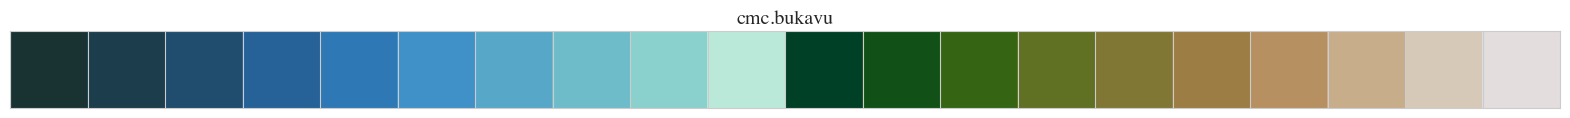

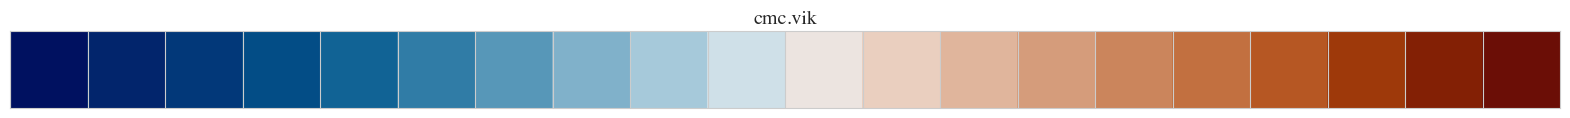

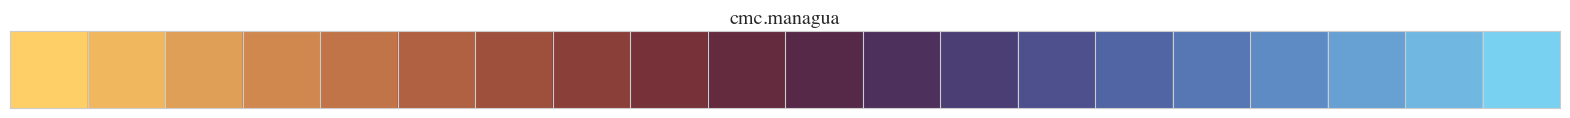

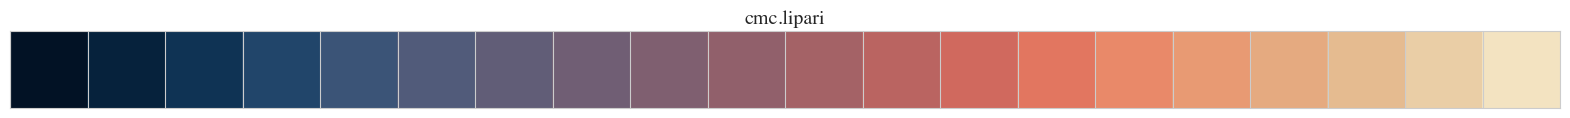

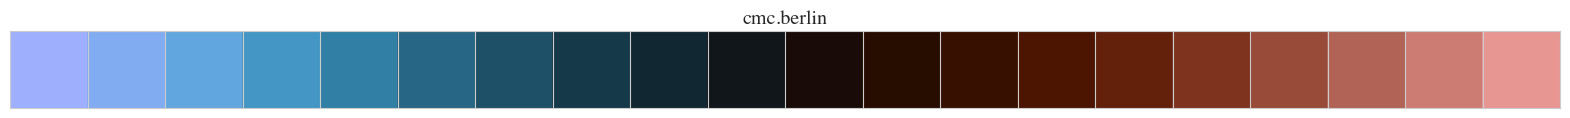

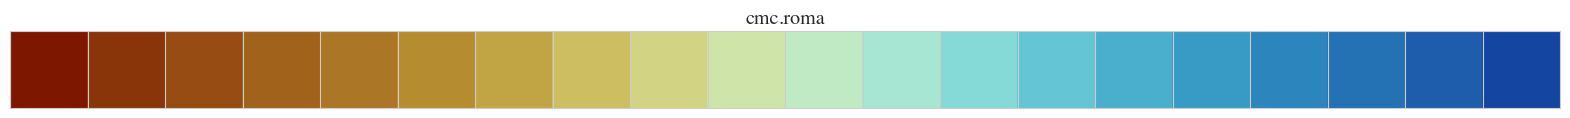

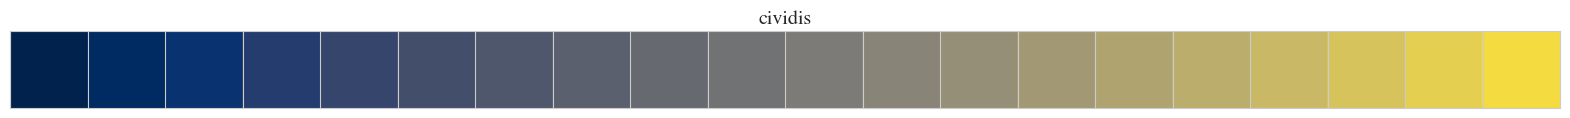

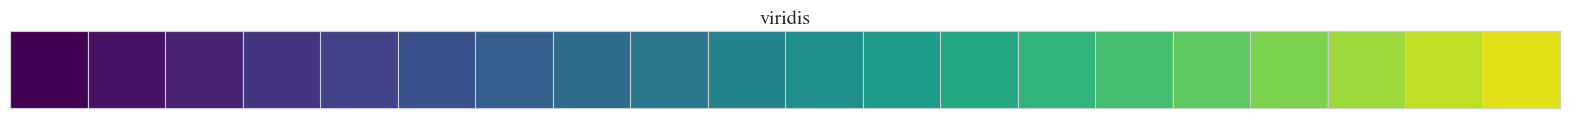

In [27]:
def create_palette(colormap_name, indices):
    try:
        colormap = plt.get_cmap(colormap_name)
        palette = colormap(indices)
        return palette
    except ValueError:
        print(f"Colormap '{colormap_name}' is not found.")
        return None

def display_palette(palette, title):
    if palette is not None:
        sns.palplot(palette)
        plt.title(title)
    else:
        print(f"Palette for '{title}' could not be displayed.")

num_colors = 200
color_indices = np.linspace(0, 1, num_colors)
selected_indices = list(range(0, 200, 10))

# Dictionary to store palettes
palettes = {}

# Create palettes for each colormap
for colormap_name in ['cmc.bukavu','cmc.vik','cmc.managua','cmc.lipari', 'cmc.berlin','cmc.roma', 'cividis', 'viridis']:
    palettes[colormap_name] = create_palette(colormap_name, color_indices[selected_indices])

# Optional: Display the palettes
for name, palette in palettes.items():
    display_palette(palette, name)

plt.show()

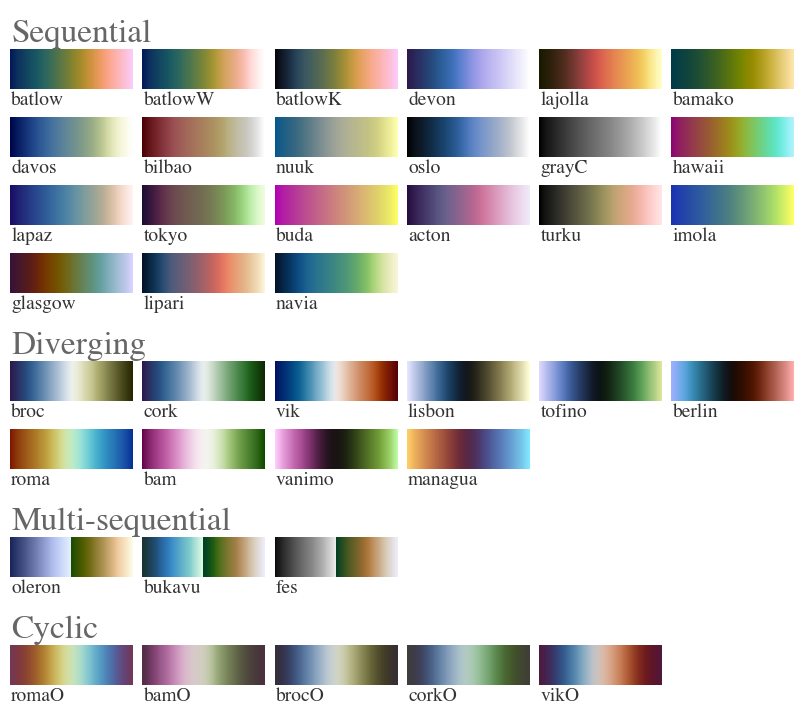

In [28]:
from cmcrameri import show_cmaps
show_cmaps()

In [29]:
hex_codes = palettes['cmc.roma']
color_mapping = {
    'Public Building': hex_codes[1],
    'Residential Building': hex_codes[-2],
    'Active Agent': hex_codes[4],
    'Passive Agent': hex_codes[-5],
    'Default_color': '#000000',
    'Building Task': '#000000',
    'Agent Task': '#000000'
}
# Subset to get the first two key-value pairs
Colors_Build = {k: color_mapping[k] for k in list(color_mapping)[:2]}
Colors_Agent = {k: color_mapping[k] for k in list(color_mapping)[2:]}

In [72]:
hex_codes

array([[4.92325e-01, 9.07870e-02, 7.60000e-05, 1.00000e+00],
       [5.43266e-01, 2.05524e-01, 3.59250e-02, 1.00000e+00],
       [5.91737e-01, 3.00697e-01, 7.45640e-02, 1.00000e+00],
       [6.33994e-01, 3.84670e-01, 1.10736e-01, 1.00000e+00],
       [6.73440e-01, 4.65303e-01, 1.47848e-01, 1.00000e+00],
       [7.14426e-01, 5.50692e-01, 1.95605e-01, 1.00000e+00],
       [7.58523e-01, 6.45147e-01, 2.69325e-01, 1.00000e+00],
       [8.00699e-01, 7.46187e-01, 3.83072e-01, 1.00000e+00],
       [8.23613e-01, 8.32270e-01, 5.17753e-01, 1.00000e+00],
       [8.11371e-01, 8.96160e-01, 6.60600e-01, 1.00000e+00],
       [7.52665e-01, 9.18838e-01, 7.65957e-01, 1.00000e+00],
       [6.52735e-01, 9.02379e-01, 8.24863e-01, 1.00000e+00],
       [5.25217e-01, 8.51658e-01, 8.43811e-01, 1.00000e+00],
       [3.94062e-01, 7.75727e-01, 8.33595e-01, 1.00000e+00],
       [2.87067e-01, 6.89401e-01, 8.06696e-01, 1.00000e+00],
       [2.20062e-01, 6.10472e-01, 7.76315e-01, 1.00000e+00],
       [1.74797e-01, 5.2

In [30]:
def calculate_dwelling_summary(data):
    """
    Calculate the dwelling summary given the data.
    """
    # Group and aggregate data
    agg_funcs = ['size', 'mean', 'median', 'std']
    grouped_data = data.groupby(["Agent_Category", "Building_Category"])[["Dwelling_Time_Agent_Gaze", "Dwelling_Time_Building_Gaze"]].agg(agg_funcs)

    # Refactor multi-index columns
    grouped_data.columns = ['_'.join(col) for col in grouped_data.columns]
    
    # Calculate standard errors
    grouped_data["Standard_error_building"] = grouped_data.Dwelling_Time_Building_Gaze_std/np.sqrt(grouped_data.Dwelling_Time_Agent_Gaze_size)
    grouped_data["Standard_error_agent"] = grouped_data.Dwelling_Time_Agent_Gaze_std/np.sqrt(grouped_data.Dwelling_Time_Agent_Gaze_size)
    
    # Rename size column for clarity
    grouped_data.rename({"Dwelling_Time_Agent_Gaze_size": "Size"}, axis=1, inplace=True)
    
    # Reset index and return the final DataFrame
    return grouped_data.reset_index()

# Using the function for both experiments
Dwelling_Summary_Exp1 = calculate_dwelling_summary(BehavioralData_Fixations_Wide_Exp1)
Dwelling_Summary_Exp2 = calculate_dwelling_summary(BehavioralData_Fixations_Wide_Exp2)
Complete_Experiments_Summary = calculate_dwelling_summary(Complete_Experiments)

# Display Dwelling_Summary_Exp2
Dwelling_Summary_Exp2 

,Agent_Category,Building_Category,Size,Dwelling_Time_Agent_Gaze_mean,Dwelling_Time_Agent_Gaze_median,Dwelling_Time_Agent_Gaze_std,Dwelling_Time_Building_Gaze_size,Dwelling_Time_Building_Gaze_mean,Dwelling_Time_Building_Gaze_median,Dwelling_Time_Building_Gaze_std,Standard_error_building,Standard_error_agent
0,Active,Public,1591,4.032635,2.598048,4.124508,1591,10.381891,8.252486,9.548560,0.239388,0.103404
1,Active,Residential,1482,5.002839,3.788925,4.507644,1482,13.539849,11.300390,8.162965,0.212043,0.117092
2,Passive,Public,1656,3.097557,2.323261,2.852784,1656,12.205128,10.247617,8.717453,0.214220,0.070103
3,Passive,Residential,1761,3.128689,1.949784,3.333215,1761,14.182581,12.097753,9.311782,0.221898,0.079430


### Dwelling

In [31]:
#Grouping for 4 separete colors 

grouped = BehavioralData_Fixations_Wide_Exp2.groupby(["Agent_Category", "Building_Category"])[["Dwelling_Time_Building_Gaze","Dwelling_Time_Agent_Gaze"]].mean().reset_index()
grouped["Building_Agent"] = grouped["Building_Category"] + " location \n" + grouped["Agent_Category" ] + " Agent"  

# Create a new column for the total dwelling time and sort the DataFrame by it
grouped['Total_Dwelling_Time'] = grouped['Dwelling_Time_Building_Gaze'] + grouped['Dwelling_Time_Agent_Gaze']
grouped['m'] = pd.Categorical(grouped['Building_Agent'], ["Public location \nActive Agent", "Public location \nPassive Agent", "Residential location \nActive Agent", "Residential location \nPassive Agent"])
grouped = grouped.sort_values(by="m")

# Determine colors based on conditions
bottom_colors = [hex_codes[1] if building == 'Public' else hex_codes[-2] for building in grouped['Building_Category']]  # Darker shades
top_colors = [hex_codes[4] if agent == 'Active' else hex_codes[-5] for agent in grouped['Agent_Category']]  # Original shades

# Define the position for the bars
bar_positions = range(len(grouped))

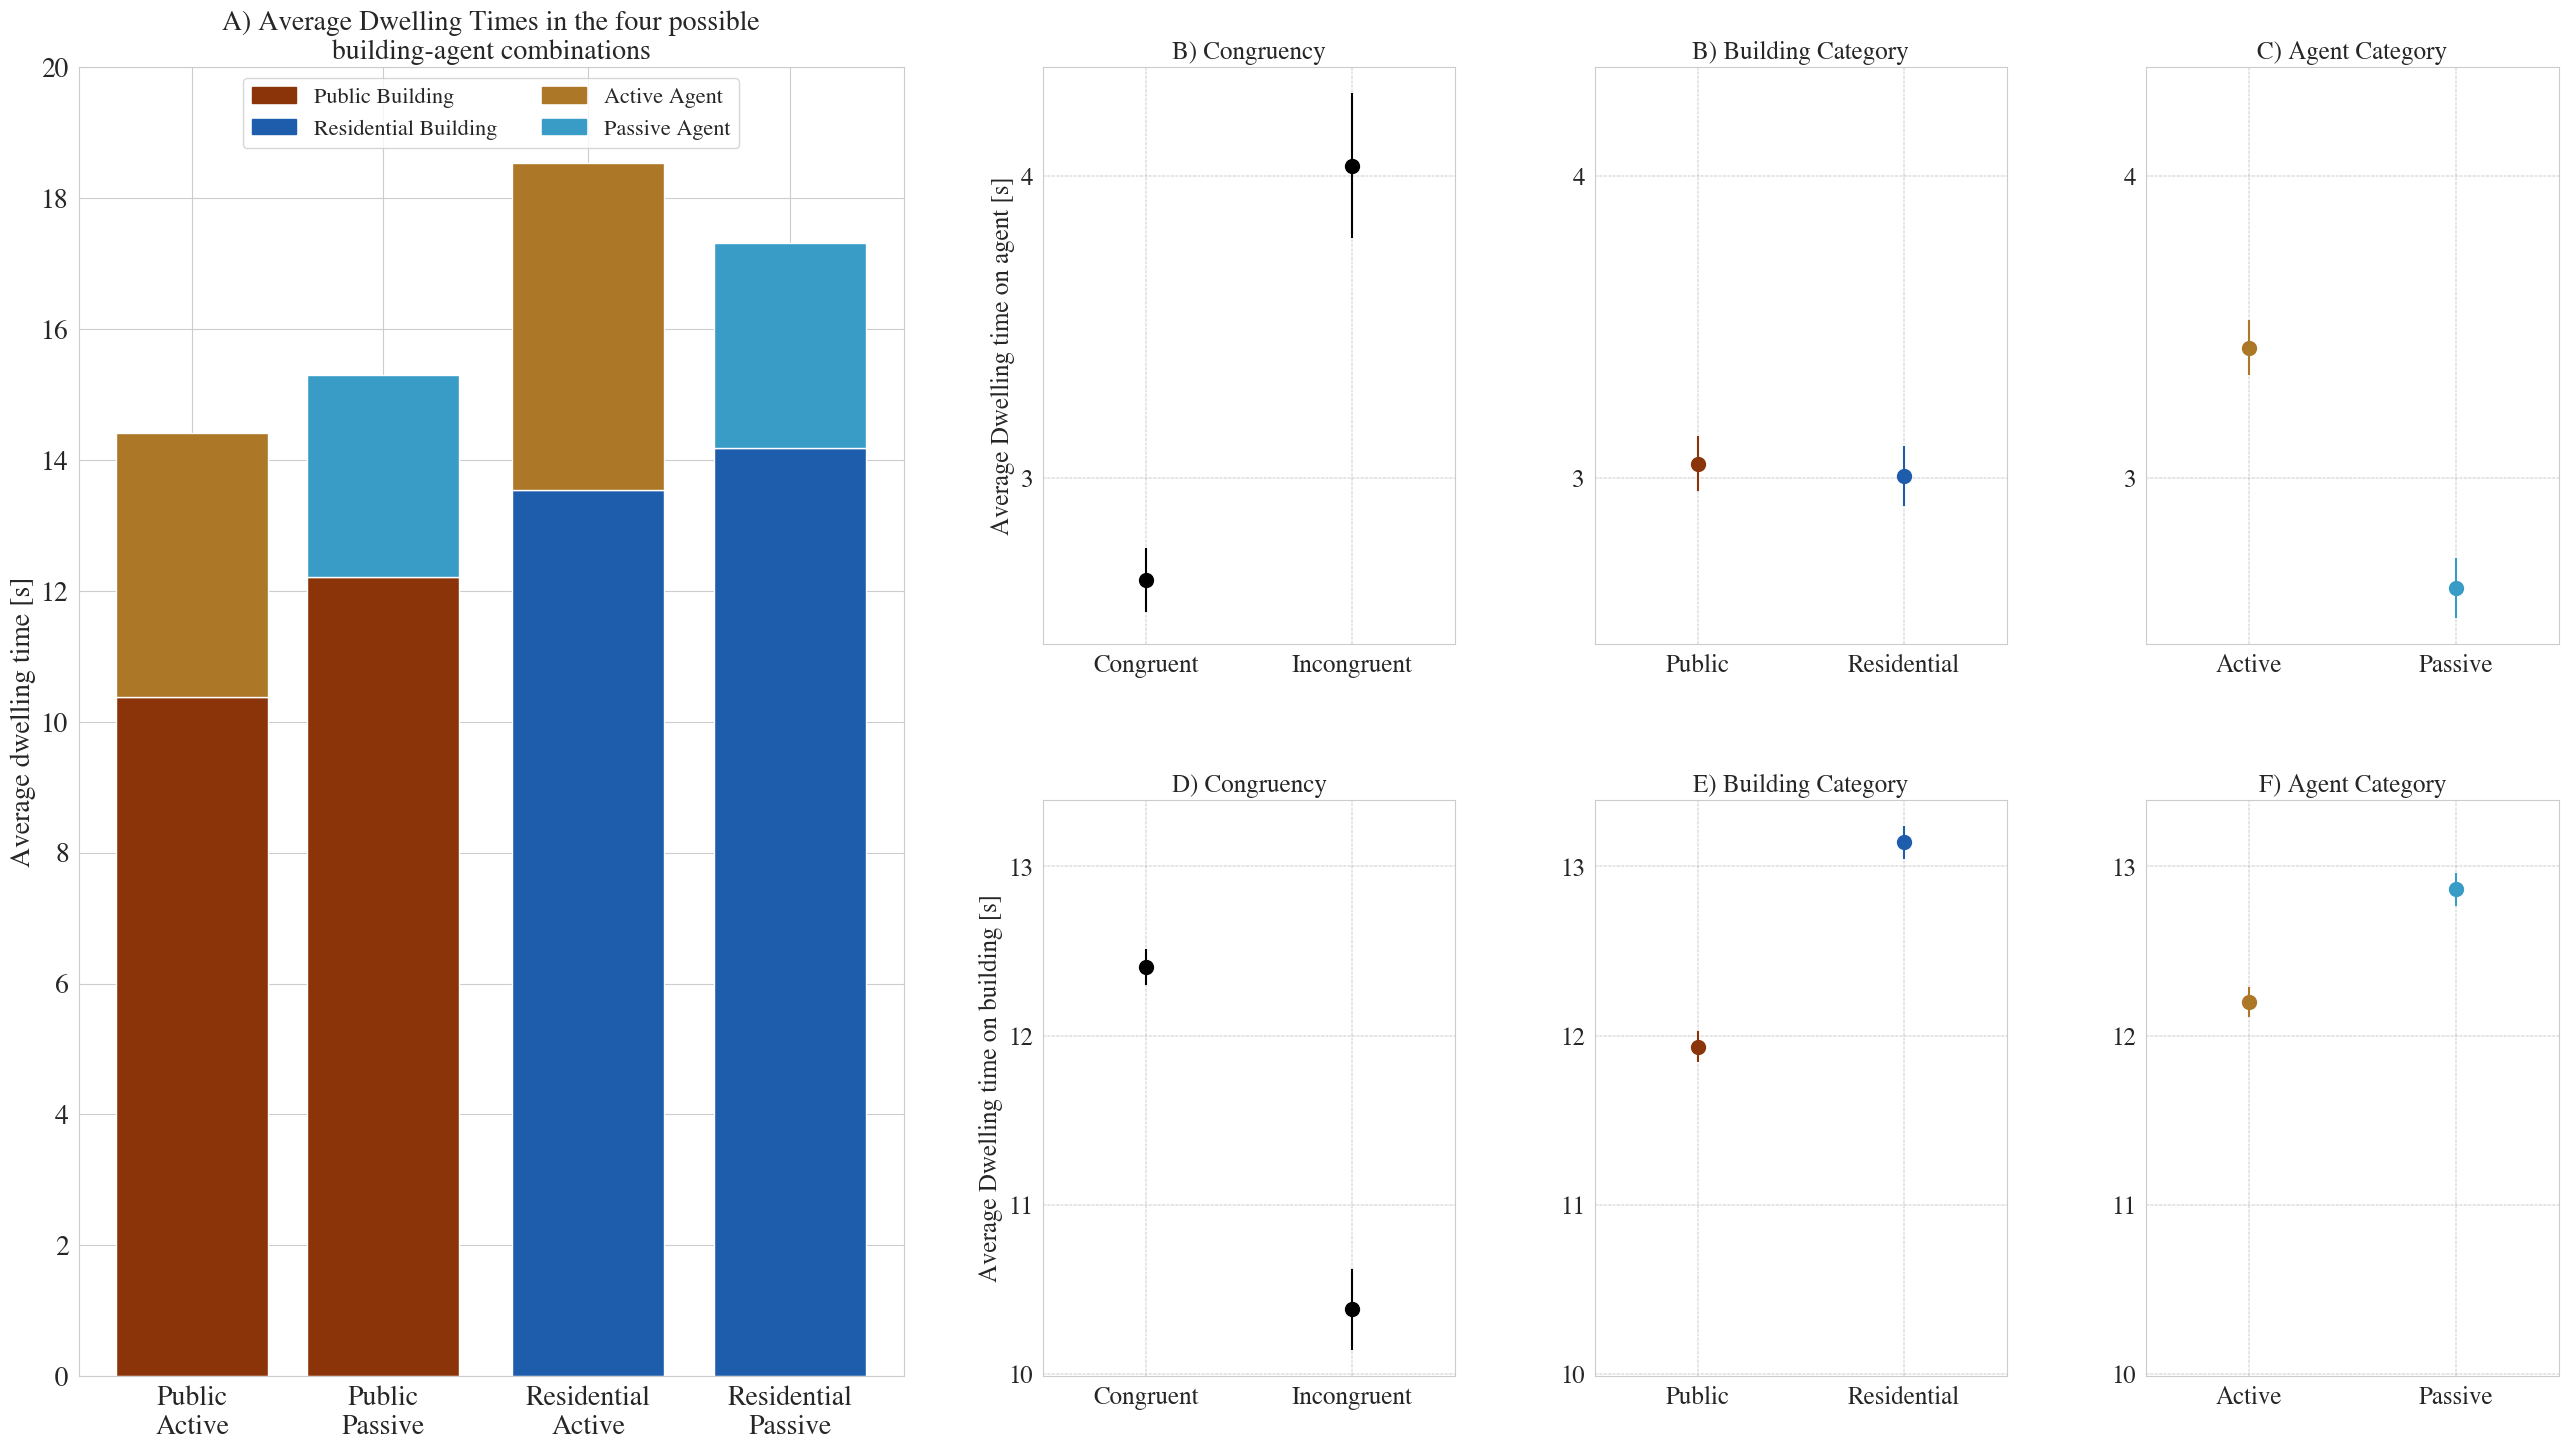

In [32]:
# Renamed what will be the labes for plot ax0
grouped['Building_Agent'] = ["Public\nActive", "Public\nPassive","Residential\nActive", "Residential\nPassive"]

# Define the position for the bars
bar_positions = range(len(grouped))
offsets = itertools.cycle([-0.04, -0.04, 0.04, 0.1])
# Calculate new positions
new_bar_positions = [pos + offset for pos, offset in zip(bar_positions, offsets)]

# Create a new figure
fig = plt.figure(figsize=(32, 17))
gs = gridspec.GridSpec(2, 4,  width_ratios=[2, 1, 1, 1]) # Define the grid structure
gs.update(wspace=0.27, hspace=0.27)

ax0 = fig.add_subplot(gs[0:2,0:1]) # Add the first plot

# Plot the data with the determined colors
ax0.bar(new_bar_positions, grouped['Dwelling_Time_Building_Gaze'], color=bottom_colors)
ax0.bar(new_bar_positions, grouped['Dwelling_Time_Agent_Gaze'], bottom=grouped['Dwelling_Time_Building_Gaze'], color=top_colors)

# Set the x-ticks and their labels
ax0.set_ylim((0, 20))
ax0.set_xticks(new_bar_positions)
ax0.set_xticklabels(grouped['Building_Agent'], rotation=0)
loc = plt.MaxNLocator(integer=True)
ax0.yaxis.set_major_locator(loc)
ax0.tick_params(axis='y', labelsize=20)
ax0.tick_params(axis='x', labelsize=20)
ax0.yaxis.get_label().set_fontsize(20)

# Add labels and title
#ax0.set_xlabel('Experimental buildings')
ax0.set_ylabel('Average dwelling time [s]')
ax0.set_title(' A) Average Dwelling Times in the four possible \nbuilding-agent combinations',  fontsize=20)


# Create custom legend
legend_elements = [mpatches.Patch(color=hex_codes[1], label='Public Building'),
                   mpatches.Patch(color=hex_codes[-2], label='Residential Building'),
                   mpatches.Patch(color=hex_codes[4], label='Active Agent'),
                   mpatches.Patch(color=hex_codes[-5], label='Passive Agent')]
ax0.legend(ncol=2, loc= "upper center", handles=legend_elements, fontsize=16)



def configure_errorbar_plot(ax, data, title, x_col, y_col):
    for df, label in data:
        ax.errorbar(x=df[x_col], y=df[y_col],
                    yerr=df["Standard_error_building"], fmt='o', color=color_mapping[label], label=label, markersize=10, capthick=20)
    ax.set_title(title, fontsize=18)
    loc = plt.MaxNLocator(integer=True)
    ax.yaxis.set_major_locator(loc)
    ax.set_xlim((-0.5, 1.5))
    ax.grid(True, color="grey", linewidth="0.3", linestyle="-.")
    ax.tick_params(axis='both', labelsize=18)
    ax.yaxis.get_label().set_fontsize(18)
    

# Add and configure subplots

ax1 = fig.add_subplot(gs[0, 1])
configure_errorbar_plot(ax1, [(Dwelling_data['Exp1_Active'][Dwelling_data['Exp1_Active'].Congruent ==  "Congruent"], 'Default_color'), (Dwelling_data['Exp2_Active'][Dwelling_data['Exp2_Active'].Building_Category == 'Public'], 'Default_color')], 'B) Congruency', "Congruent", "Dwelling_Time_Agent_Gaze_mean")

ax2 = fig.add_subplot(gs[0, 2], sharey= ax1)
configure_errorbar_plot(ax2, [(Complete_Experiments_Building[Complete_Experiments_Building.Building_Category == 'Public'],'Public Building'), (Complete_Experiments_Building[Complete_Experiments_Building.Building_Category == 'Residential'],'Residential Building')], 'B) Building Category', "Building_Category", "Dwelling_Time_Agent_Gaze_mean")

ax3 = fig.add_subplot(gs[0, 3], sharey= ax1)
configure_errorbar_plot(ax3, [(Complete_Experiments_Agent[Complete_Experiments_Agent.Agent_Category == "Active"], "Active Agent"), (Complete_Experiments_Agent[Complete_Experiments_Agent.Agent_Category == "Passive"], "Passive Agent")], 'C) Agent Category', "Agent_Category", "Dwelling_Time_Agent_Gaze_mean")

ax4 = fig.add_subplot(gs[1, 1])
configure_errorbar_plot(ax4, [(Dwelling_data['Exp1_Active'][Dwelling_data['Exp1_Active'].Congruent ==  "Congruent"], 'Default_color'), (Dwelling_data['Exp2_Active'][Dwelling_data['Exp2_Active'].Building_Category == 'Public'], 'Default_color')], 'D) Congruency', "Congruent", "Dwelling_Time_Building_Gaze_mean")

ax5 = fig.add_subplot(gs[1, 2],sharey= ax4 )
configure_errorbar_plot(ax5, [(Complete_Experiments_Building[Complete_Experiments_Building.Building_Category == 'Public'],'Public Building'), (Complete_Experiments_Building[Complete_Experiments_Building.Building_Category == 'Residential'],'Residential Building') ], 'E) Building Category', "Building_Category", "Dwelling_Time_Building_Gaze_mean")

ax5 = fig.add_subplot(gs[1, 3],sharey= ax4 )
configure_errorbar_plot(ax5, [(Complete_Experiments_Agent[Complete_Experiments_Agent.Agent_Category == "Active"], "Active Agent"), (Complete_Experiments_Agent[Complete_Experiments_Agent.Agent_Category == "Passive"], "Passive Agent")], 'F) Agent Category', "Agent_Category", "Dwelling_Time_Building_Gaze_mean")

axes_settings = {
    ax1: ("Average Dwelling time on agent [s]"),
    ax4: ("Average Dwelling time on building [s]")
}

for ax, (ylabel) in axes_settings.items():
    ax.set_ylabel(ylabel)
    #ax.legend(loc=legend_loc, fontsize=20)

plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Dwelling_times.png",  bbox_inches="tight",
            pad_inches=0.3)
plt.show()


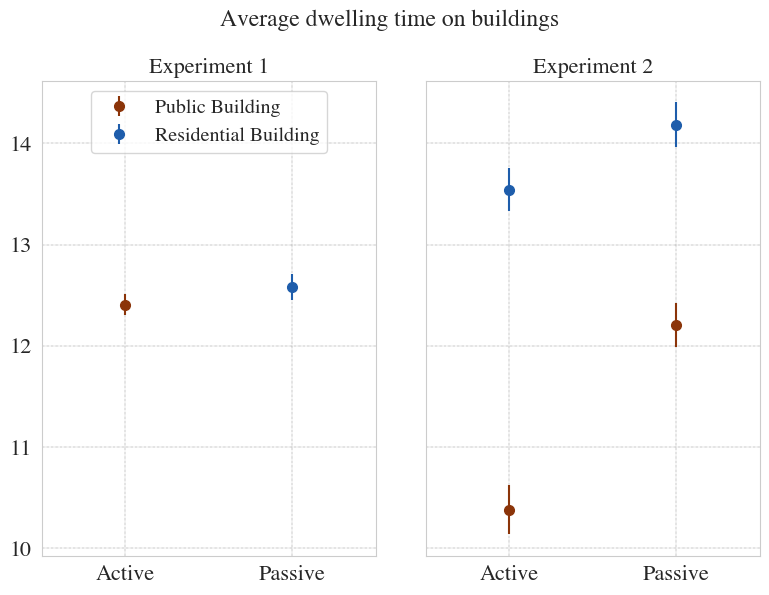

In [33]:
def plot_errorbar(ax, data, y_col, yerr_col, color, label):
    ax.errorbar(x=data["Agent_Category"], 
                y=data[y_col], 
                yerr=data[yerr_col], 
                fmt='o', color=color, 
                label=label, 
                markersize=7, capthick=20)

# Dictionary to streamline data selection
exp_data = {
    "Experiment 1": {"Public Building": Dwelling_data['Exp1_Public'], "Residential Building": Dwelling_data['Exp1_Residential']},
    "Experiment 2": {"Public Building": Dwelling_data['Exp2_Public'], "Residential Building": Dwelling_data['Exp2_Residential']}
}

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(8, 6))
fig.suptitle('Average dwelling time on buildings \n', fontsize=17)
fig.tight_layout()

# Loop through the experiments and data, plotting as we go
for ax, (exp, datasets) in zip(axes, exp_data.items()):
    for label, data in datasets.items():
        plot_errorbar(ax, data, "Dwelling_Time_Building_Gaze_mean", "Standard_error_building", Colors_Build[label], label)
    
    ax.set_xlim((-0.5, 1.5))
    ax.set_xticks([0, 1])
    #ax.set_xticklabels(["Active agent", "Passive Agent"])
    ax.grid(True, color="grey", linewidth="0.3", linestyle="-.")
    ax.tick_params(axis='both', labelsize=16)
    ax.yaxis.get_label().set_fontsize(16)
    ax.set_title(exp, fontsize=16)
axes[0].legend(loc="upper center",)

plt.show()


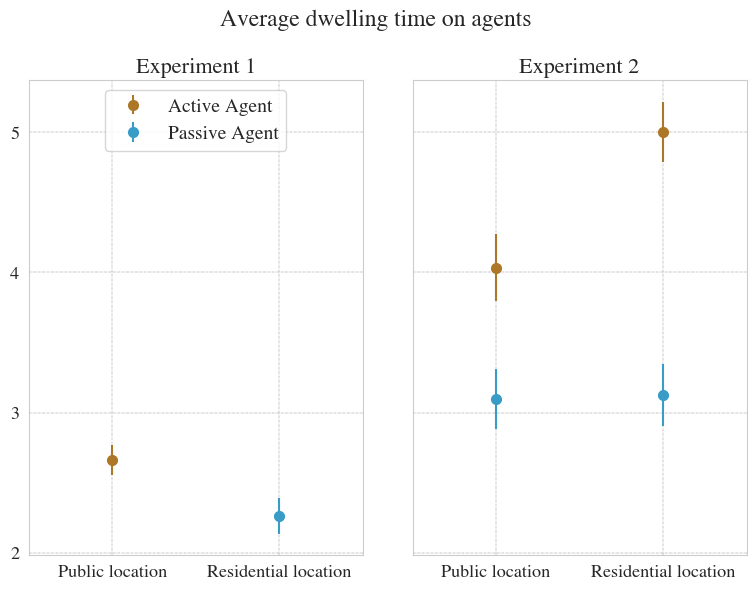

In [34]:
def plot_errorbar_agent(ax, data, y_col, yerr_col, color, label, linestyle=' '):
    ax.errorbar(x=data["Building_Category"], 
                y=data[y_col], 
                yerr=data[yerr_col], 
                fmt='o'+linestyle, color=color, 
                label=label, 
                markersize=7, capthick=20)

# Dictionary to streamline data selection
exp_data_agent = {
    "Experiment 1": {"Active Agent": Dwelling_data['Exp1_Active'], "Passive Agent": Dwelling_data['Exp1_Passive']},
    "Experiment 2": {"Active Agent": Dwelling_data['Exp2_Active'], "Passive Agent": Dwelling_data['Exp2_Passive']}
}


fig, axes = plt.subplots(1, 2, sharey=True, figsize=(8, 6))
fig.suptitle('Average dwelling time on agents \n', fontsize=17)
fig.tight_layout()

# Loop through the experiments and data, plotting as we go
for ax, (exp, datasets) in zip(axes, exp_data_agent.items()):
    for label, data in datasets.items():
        plot_errorbar_agent(ax, data, "Dwelling_Time_Agent_Gaze_mean", "Standard_error_building", Colors_Agent[label], label)
    
    ax.set_xlim((-0.5, 1.5))
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Public location", "Residential location"])
    ax.grid(True, color="grey", linewidth="0.3", linestyle="-.")
    ax.tick_params(axis='both', labelsize=13)
    ax.yaxis.get_label().set_fontsize(16)
    ax.set_title(exp, fontsize=16)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Move tight_layout to the end

axes[0].legend(loc="upper center", fontsize=14)

plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Dwelling_Agent.png",  bbox_inches="tight", pad_inches=0.3, transparent=True)



In [35]:
grouped.columns

Index(['Agent_Category', 'Building_Category', 'Dwelling_Time_Building_Gaze',
       'Dwelling_Time_Agent_Gaze', 'Building_Agent', 'Total_Dwelling_Time',
       'm'],
      dtype='object')

In [36]:
range(len(grouped))

range(0, 4)

In [37]:
Complete_Experiments_Building["Building_Category"]

0         Public
1    Residential
Name: Building_Category, dtype: object

In [38]:
Complete_Experiments_Building.head()

,Building_Category,Size,Dwelling_Time_Agent_Gaze_mean,Dwelling_Time_Agent_Gaze_median,Dwelling_Time_Agent_Gaze_std,Dwelling_Time_Building_Gaze_size,Dwelling_Time_Building_Gaze_mean,Dwelling_Time_Building_Gaze_median,Dwelling_Time_Building_Gaze_std,Standard_error_building,Standard_error_agent
0,Public,8258,3.047182,2.160697,3.048982,8258,11.93365,10.582105,8.274786,0.091058,0.033552
1,Residential,8280,3.007781,1.831297,3.325252,8280,13.14063,10.977301,8.957857,0.098444,0.036543


In [39]:
Complete_Experiments.groupby('Building_Category')[ "Dwelling_Time_Agent_Gaze"].mean()

Building_Category
Public         3.047182
Residential    3.007781
Name: Dwelling_Time_Agent_Gaze, dtype: float64

In [40]:
Complete_Experiments

,SubjectID,AbsolutError,SignedAngle-+180,IQR,RT,DistanceToParticipant,PointingTaskStartingLocations,TrialNumber,StartPointID,ID_for_StartingPosition,...,ImageName,Dwelling_Time_Building_Gaze,Fixation_Count_Building_Gaze,Dwelling_Time_Agent_Gaze,Fixation_Count_Agent_Gaze,Agent_Action_level,Agent_Category,Building_Category,Congruent,Task
0,365,15.396716,15.396716,63.921884,25.825715,197.768723,21,1,1,1,...,46_Sa,37.230251,186.0,3.428844,12.0,Passive,Passive,Residential,Incongruent,NaN
1,365,6.037733,-6.037733,63.921884,4.799789,213.475525,16,78,7,6,...,46_SaNo,37.230251,186.0,3.428844,12.0,Passive,Passive,Residential,Incongruent,NaN
2,365,6.345290,6.345290,63.921884,4.638590,111.623512,13,88,8,4,...,46_Sa,37.230251,186.0,3.428844,12.0,Passive,Passive,Residential,Incongruent,NaN
3,365,3.627752,3.627752,63.921884,2.361455,111.623512,13,95,8,11,...,46_SaNo,37.230251,186.0,3.428844,12.0,Passive,Passive,Residential,Incongruent,NaN
4,365,19.115237,-19.115237,63.921884,5.975304,232.765823,8,131,11,11,...,46_SaNo,37.230251,186.0,3.428844,12.0,Passive,Passive,Residential,Incongruent,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6485,3540,4.922629,-4.922629,77.822989,4.667887,245.611038,12,182,23,6,...,35_CmANo_42,6.262073,43.0,1.973486,11.0,NaN,Passive,Public,Incongruent,Building
6486,3540,38.229867,-38.229867,77.822989,1.711214,317.307739,8,194,25,2,...,35_CmANo_42,6.262073,43.0,1.973486,11.0,NaN,Passive,Public,Incongruent,Building
6487,3540,94.416805,-94.416805,77.822989,8.394359,227.438751,24,47,6,7,...,05_CmANoAct_05,NaN,NaN,NaN,NaN,NaN,Active,Public,Incongruent,Building
6488,3540,34.262253,-34.262253,77.822989,9.918083,252.766769,22,70,9,6,...,05_CmAAct_05,NaN,NaN,NaN,NaN,NaN,Active,Public,Incongruent,Building


<Figure size 1500x500 with 0 Axes>

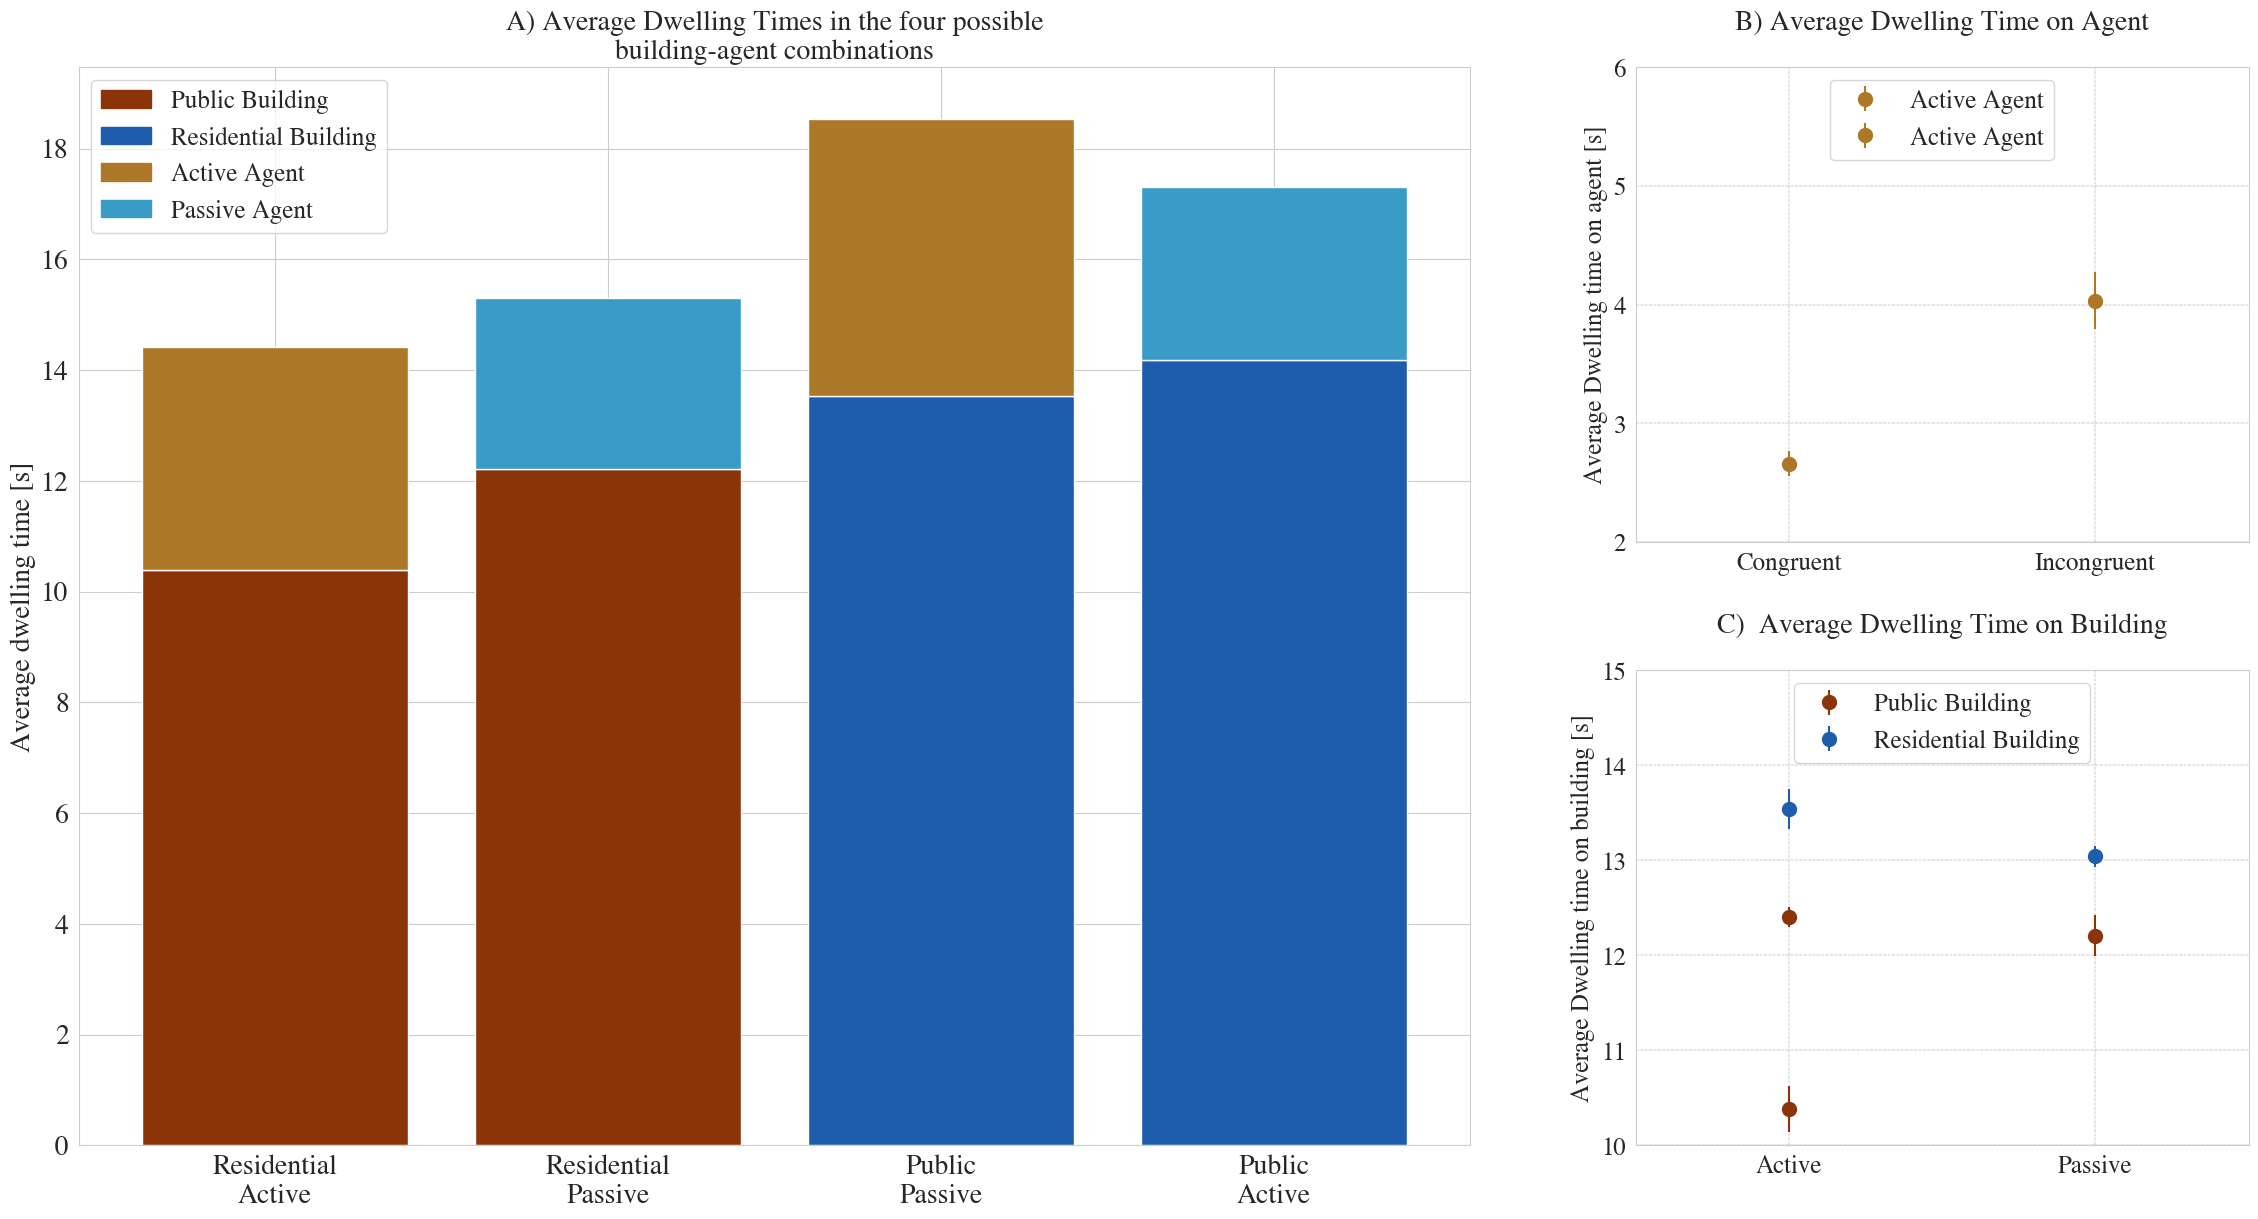

In [41]:
# Renamed what will be the labes for plot ax0
grouped['Building_Agent'] = ["Residential\nActive", "Residential\nPassive", "Public\nPassive", "Public\nActive"]

plt.tight_layout()
# Make all locators integers

# Define the position for the bars
bar_positions = range(len(grouped))

# Create a new figure
fig = plt.figure(figsize=(28, 14))
gs = gridspec.GridSpec(2, 3) # Define the grid structure
gs.update(wspace=0.27, hspace=0.27)

ax0 = fig.add_subplot(gs[0:2,0:2]) # Add the first plot

# Plot the data with the determined colors
ax0.bar(bar_positions, grouped['Dwelling_Time_Building_Gaze'], color=bottom_colors)
ax0.bar(bar_positions, grouped['Dwelling_Time_Agent_Gaze'], bottom=grouped['Dwelling_Time_Building_Gaze'], color=top_colors)

# Set the x-ticks and their labels
ax0.set_xticks(bar_positions)
ax0.set_xticklabels(grouped['Building_Agent'], rotation=0)
ax0.yaxis.set_major_locator(loc)
ax0.tick_params(axis='both', labelsize=20)
ax0.yaxis.get_label().set_fontsize(20)

# Add labels and title
#ax0.set_xlabel('Experimental buildings')
ax0.set_ylabel('Average dwelling time [s]')
ax0.set_title(' A) Average Dwelling Times in the four possible \nbuilding-agent combinations',  fontsize=20)

ax0.legend(handles=legend_elements, fontsize=18)



def configure_errorbar_plot(ax, data, title, x_col, y_col):
    for df, label in data:
        ax.errorbar(x=df[x_col], y=df[y_col],
                    yerr=df["Standard_error_building"], fmt='o', color=color_mapping[label], label=label, markersize=10, capthick=20)
    ax.set_title(title, fontsize=20)
    loc = plt.MaxNLocator(integer=True)
    ax.yaxis.set_major_locator(loc)
    ax.set_xlim((-0.5, 1.5))
    ax.grid(True, color="grey", linewidth="0.3", linestyle="-.")
    ax.tick_params(axis='both', labelsize=18)
    ax.yaxis.get_label().set_fontsize(18)
    ax.legend(loc="upper center")
    

# Add and configure subplots
ax1 = fig.add_subplot(gs[0, 2])
configure_errorbar_plot(ax1, [(Dwelling_data['Complete_Active'][Dwelling_data['Complete_Active'].Congruent == 1], 'Active Agent'), (Dwelling_data['Complete_Active'][Dwelling_data['Complete_Active'].Building_Category == "Public"], 'Active Agent')], 'B) Average Dwelling Time on Agent\n', "Congruent", "Dwelling_Time_Agent_Gaze_mean")
ax1.set_ylim((2,6))


ax2 = fig.add_subplot(gs[1, 2])
configure_errorbar_plot(ax2, [(Dwelling_data['Complete_Public'], 'Public Building'), (Dwelling_data['Complete_Residential'], 'Residential Building')], 'C)  Average Dwelling Time on Building\n', "Agent_Category", "Dwelling_Time_Building_Gaze_mean")
ax2.set_ylim((10,15))

axes_settings = {
    ax1: ("Average Dwelling time on agent [s]", "upper center"),
    ax2: ("Average Dwelling time on building [s]", "upper center")
}

for ax, (ylabel, legend_loc) in axes_settings.items():
    ax.set_ylabel(ylabel)
    ax.legend(loc=legend_loc, fontsize=18)

#plt.tight_layout()
plt.show()

In [42]:
Dwelling_data['Complete_Active'][Dwelling_data['Complete_Active'].Building_Category == "Public"]

,Congruent,Agent_Category,Building_Category,Size,Dwelling_Time_Agent_Gaze_mean,Dwelling_Time_Agent_Gaze_median,Dwelling_Time_Agent_Gaze_std,Dwelling_Time_Building_Gaze_size,Dwelling_Time_Building_Gaze_mean,Dwelling_Time_Building_Gaze_median,Dwelling_Time_Building_Gaze_std,Standard_error_building,Standard_error_agent
0,Congruent,Active,Public,5011,2.662227,2.010781,2.522774,5011,12.407331,11.187102,7.489482,0.105801,0.035638
1,Incongruent,Active,Public,1591,4.032635,2.598048,4.124508,1591,10.381891,8.252486,9.548560,0.239388,0.103404


In [43]:
Dwelling_data['Complete_Passive'][Dwelling_data['Complete_Passive'].Congruent == 0]

,Congruent,Agent_Category,Building_Category,Size,Dwelling_Time_Agent_Gaze_mean,Dwelling_Time_Agent_Gaze_median,Dwelling_Time_Agent_Gaze_std,Dwelling_Time_Building_Gaze_size,Dwelling_Time_Building_Gaze_mean,Dwelling_Time_Building_Gaze_median,Dwelling_Time_Building_Gaze_std,Standard_error_building,Standard_error_agent


In [44]:
display(Performance_Summary_Exp1)
display(Performance_Summary_Exp2)

,Agent_Category,Building_Category,Size,AbsolutError_mean,AbsolutError_median,AbsolutError_std,RT_size,RT_mean,RT_median,RT_std,Standard_error_performance
0,Active,Public,5011,47.167095,31.281232,45.127142,5011,8.113558,6.451460,5.604503,0.637493
1,Passive,Residential,5037,50.146555,37.653353,44.476413,5037,7.883778,6.173721,5.730181,0.626677


,Agent_Category,Building_Category,Size,AbsolutError_mean,AbsolutError_median,AbsolutError_std,RT_size,RT_mean,RT_median,RT_std,Standard_error_performance
0,Active,Public,1591,45.625846,30.846345,43.061577,1591,9.120443,7.396342,6.278223,1.079580
1,Active,Residential,1482,45.849850,34.678865,41.893791,1482,8.973705,7.203692,6.332908,1.088242
2,Passive,Public,1656,48.439834,33.770660,45.649078,1656,9.250494,7.524088,6.389727,1.121765
3,Passive,Residential,1761,54.471034,39.891453,46.349093,1761,8.545156,6.608737,6.447019,1.104489


### Performance

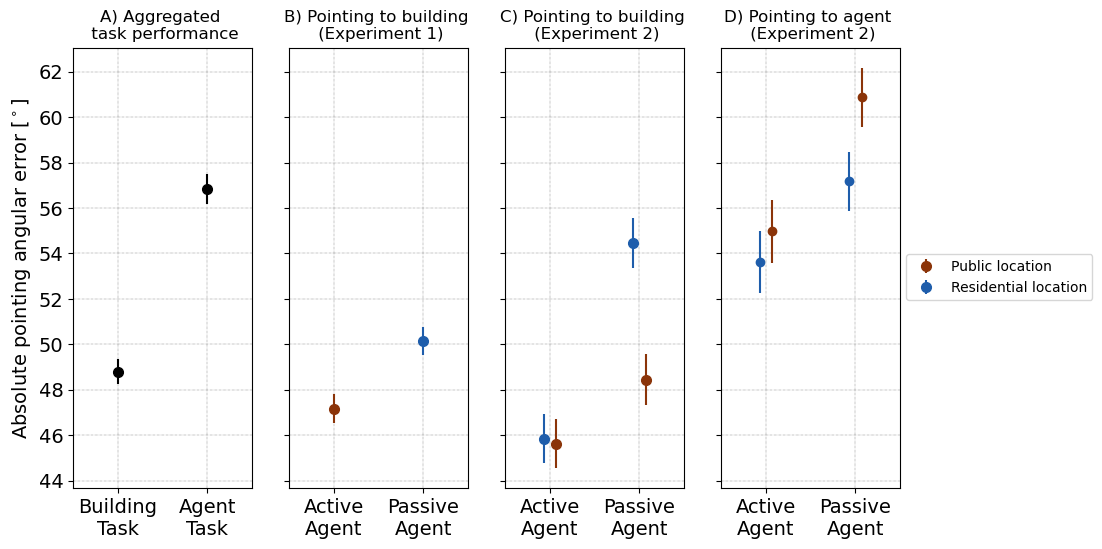

In [45]:
plt.style.use('default')
fig, axes = plt.subplots(1, 4, sharey=True,  figsize=(9, 5))
#fig.suptitle('Pointing task performance \n', fontsize=18)
fig.tight_layout()

#Building Vs Agent

axes[0].errorbar(x= SecondExp.iloc[1,0], y= SecondExp.iloc[1,3],yerr= SecondExp.iloc[1,6], color='#000000', markersize=7, capthick=20, fmt='o')
axes[0].errorbar(x= SecondExp.iloc[0,0], y= SecondExp.iloc[0,3],yerr= SecondExp.iloc[0,6], color='#000000', markersize=7, capthick=20, fmt='o')
axes[0].set_title('A) Aggregated \n task performance')
axes[0].set_ylabel("Absolute pointing angular error [$^\circ$]")


#Experiment 1
axes[1].errorbar( x=Performance['Exp1_Public']["Agent_Category"],y=Performance['Exp1_Public']["AbsolutError_mean"].values,
             yerr=Performance['Exp1_Public'].Standard_error_performance, fmt='o',  color= hex_codes[1], label= "Public location", markersize=7, capthick=20)
axes[1].errorbar( x=Performance['Exp1_Residential']["Agent_Category"],y=Performance['Exp1_Residential']["AbsolutError_mean"].values,
             yerr=(Performance['Exp1_Residential'].Standard_error_performance), fmt='o--',  color= hex_codes[-2], label= "Residential location", markersize=7, capthick=20)
axes[1].set_title('B) Pointing to building \n (Experiment 1)')


# Experiment 2 
x_positioner_p = np.arange(len(Performance['Exp2_Public']["Building_Category"]))
x_positioner_r = np.arange(len(Performance['Exp2_Residential']["Agent_Category"]))
offset = 0.07
          
axes[2].errorbar(x=x_positioner_p + offset,y=Performance['Exp2_Public']["AbsolutError_mean"].values, 
             yerr=Performance['Exp2_Public'].Standard_error_performance, fmt='o', color=  hex_codes[1], label= "Public location", markersize=7, capthick=20)
axes[2].errorbar(x=x_positioner_r - offset,y=Performance['Exp2_Residential']["AbsolutError_mean"].values, 
             yerr=Performance['Exp2_Residential'].Standard_error_performance, fmt='o', color=  hex_codes[-2],  label= "Residential location", markersize=7, capthick=20)
axes[2].set_title('C) Pointing to building \n (Experiment 2)')

# Pointing to agent

axes[3].errorbar(x=x_positioner_p + offset,y=Performance['Agent_Public']["AbsolutError_mean"].values, 
             yerr=Performance['Agent_Public'].Standard_error_performance, fmt='o', color=  hex_codes[1], label= "Public location")
axes[3].errorbar(x=x_positioner_r - offset,y=Performance['Agent_Residential']["AbsolutError_mean"].values, 
             yerr=Performance['Agent_Residential'].Standard_error_performance, fmt='o', color=  hex_codes[-2],  label= "Residential location")
axes[3].set_title('D) Pointing to agent \n (Experiment 2)')
axes[3].set_xlim((-0.5, 1.5))
for n, subplot in np.ndenumerate(axes):
    subplot.set_xlim((-0.5, 1.5))
    subplot.xaxis.set_major_locator(matplotlib.ticker.FixedLocator([0,1]))
    subplot.grid(True, color = "grey", linewidth = "0.3", linestyle = "-.")
    subplot.tick_params(axis='both', labelsize=14)
    subplot.set_xticklabels(labels=["Active\nAgent", "Passive\nAgent"], multialignment= "center")
    subplot.yaxis.get_label().set_fontsize(14)
    subplot.yaxis.set_major_locator(MaxNLocator(integer=True))
axes[0].set_xticklabels(labels=["Building\nTask", "Agent\nTask"], multialignment= "center")
handles, labels = axes[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.97, 0.5))
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Absolut_Error_OneStandard_3plots.png",  bbox_inches="tight",
            pad_inches=0.3)#transparent=True

In [74]:
hex_codes[-2]


array([0.117003, 0.365049, 0.671962, 1.      ])

In [46]:
categories = {
    'Building': 'Task',
    'Agent': 'Task',
}

Datasets = {
    'Complete_Exp2': SecondExp,
}

Complete_Exp2 = {}

for exp_name, df in Datasets.items():
    for cat_name, col_name in categories.items():
        key = f"{exp_name}_{cat_name}"
        Complete_Exp2[key] = df[df[col_name] == cat_name]
        

In [47]:
for index, row in Performance['Exp2_Public'].iterrows():
    print(row)

Agent_Category                   Active
Building_Category                Public
Size                               1591
AbsolutError_mean             45.625846
AbsolutError_median           30.846345
AbsolutError_std              43.061577
RT_size                            1591
RT_mean                        9.120443
RT_median                      7.396342
RT_std                         6.278223
Standard_error_performance      1.07958
Name: 0, dtype: object
Agent_Category                  Passive
Building_Category                Public
Size                               1656
AbsolutError_mean             48.439834
AbsolutError_median            33.77066
AbsolutError_std              45.649078
RT_size                            1656
RT_mean                        9.250494
RT_median                      7.524088
RT_std                         6.389727
Standard_error_performance     1.121765
Name: 2, dtype: object


In [48]:
Performance['Exp1_Public']

,Agent_Category,Building_Category,Size,AbsolutError_mean,AbsolutError_median,AbsolutError_std,RT_size,RT_mean,RT_median,RT_std,Standard_error_performance
0,Active,Public,5011,47.167095,31.281232,45.127142,5011,8.113558,6.45146,5.604503,0.637493


In [49]:
for element in np.arange(len(Performance['Agent_Public']["Agent_Category"])): 
    print(element)

0
1


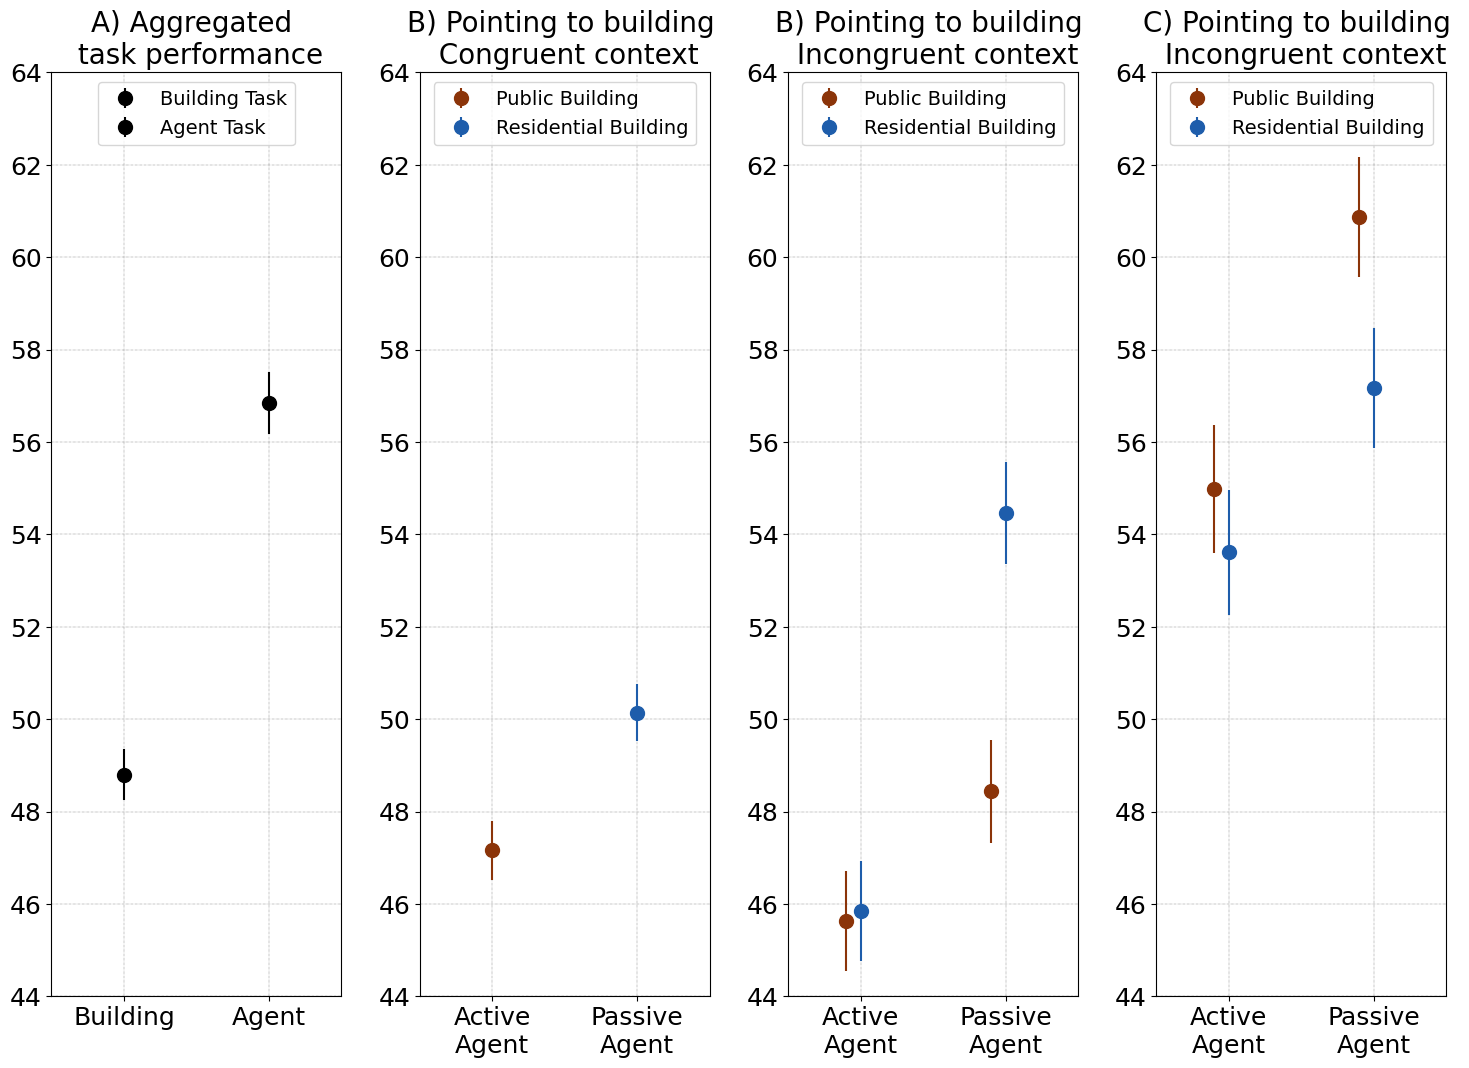

In [50]:
offset = 0.1  # Define the offset

def configure_errorbar_plotP(ax, data, title, x_col, y_col):
    # Create a mapping from categories to numerical values
    unique_categories = np.unique(np.concatenate([df[x_col] for df, _ in data]))
    category_to_number = {category: i for i, category in enumerate(unique_categories)}
    
    for i, (df, label) in enumerate(data):
        df.reset_index(inplace=True, drop=True)
        if len(df[x_col]) == 2:
            # Map categories to numbers and apply the offset
            numerical_x = df[x_col].map(category_to_number) + (i - len(data) / 2) * offset
            # Now plot each point with the adjusted x value
            ax.errorbar(x=numerical_x, y=df[y_col], yerr=df["Standard_error_performance"], fmt='o',
                        color=color_mapping.get(label, 'default_color'), label=label, 
                        markersize=10, capthick=2)
        else: 
            ax.errorbar(x=df[x_col], y=df[y_col], yerr=df["Standard_error_performance"], fmt='o',
                        color=color_mapping.get(label, 'default_color'), label=label, 
                        markersize=10, capthick=2)
        # Set up the rest of the plot
    ax.set_title(title, fontsize=20)
    loc = plt.MaxNLocator(integer=True)
    ax.yaxis.set_major_locator(loc)
    ax.set_xlim((-0.5, 1.5))
    ax.set_ylim((44, 64))
    ax.grid(True, color="grey", linewidth="0.3", linestyle="-.")
    ax.tick_params(axis='both', which='both', labelsize=18)
    ax.yaxis.get_label().set_fontsize(18)
    ax.legend(loc='upper center', fontsize=14)

    
# Create a new figure
fig = plt.figure(figsize=(18, 12))
gs = gridspec.GridSpec(1, 4) # Define the grid structure
gs.update(wspace=0.27, hspace=0.27)

ax0 = fig.add_subplot(gs[0, 0])
configure_errorbar_plotP(ax0, [(Complete_Exp2['Complete_Exp2_Building'], 'Building Task'), (Complete_Exp2['Complete_Exp2_Agent'], 'Agent Task')], 'A) Aggregated \n task performance', "Task", "mean")

ax1 = fig.add_subplot(gs[0, 1], sharey=ax0)
configure_errorbar_plotP(ax1, [(Performance['Exp1_Public'], 'Public Building'), (Performance['Exp1_Residential'], 'Residential Building')], 'B) Pointing to building \n Congruent context', "Agent_Category", "AbsolutError_mean")

ax2 = fig.add_subplot(gs[0, 2], sharey=ax0)
x_positioner_p = np.arange(len(Performance['Exp2_Public']["Agent_Category"]))
configure_errorbar_plotP(ax2, [(Performance['Exp2_Public'], 'Public Building'), (Performance['Exp2_Residential'], 'Residential Building')], 'B) Pointing to building \n Incongruent context', "Agent_Category", "AbsolutError_mean")

ax3 = fig.add_subplot(gs[0, 3], sharey=ax0)
configure_errorbar_plotP(ax3, [(Performance['Agent_Public'], 'Public Building'), (Performance['Agent_Residential'], 'Residential Building')], 'C) Pointing to building \n Incongruent context', "Agent_Category", "AbsolutError_mean")

for n, subplot in np.ndenumerate([ax1, ax2, ax3]):
    subplot.set_xticks([0,1])
    subplot.set_xticklabels( labels=["Active\nAgent", "Passive\nAgent"], multialignment= "center")
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Absolut_Error_OneStandard_3plots.png",  bbox_inches="tight",
            pad_inches=0.3, transparent=True)
plt.show()

In [51]:
Performance['Exp2_Public']

,Agent_Category,Building_Category,Size,AbsolutError_mean,AbsolutError_median,AbsolutError_std,RT_size,RT_mean,RT_median,RT_std,Standard_error_performance
0,Active,Public,1591,45.625846,30.846345,43.061577,1591,9.120443,7.396342,6.278223,1.079580
1,Passive,Public,1656,48.439834,33.770660,45.649078,1656,9.250494,7.524088,6.389727,1.121765


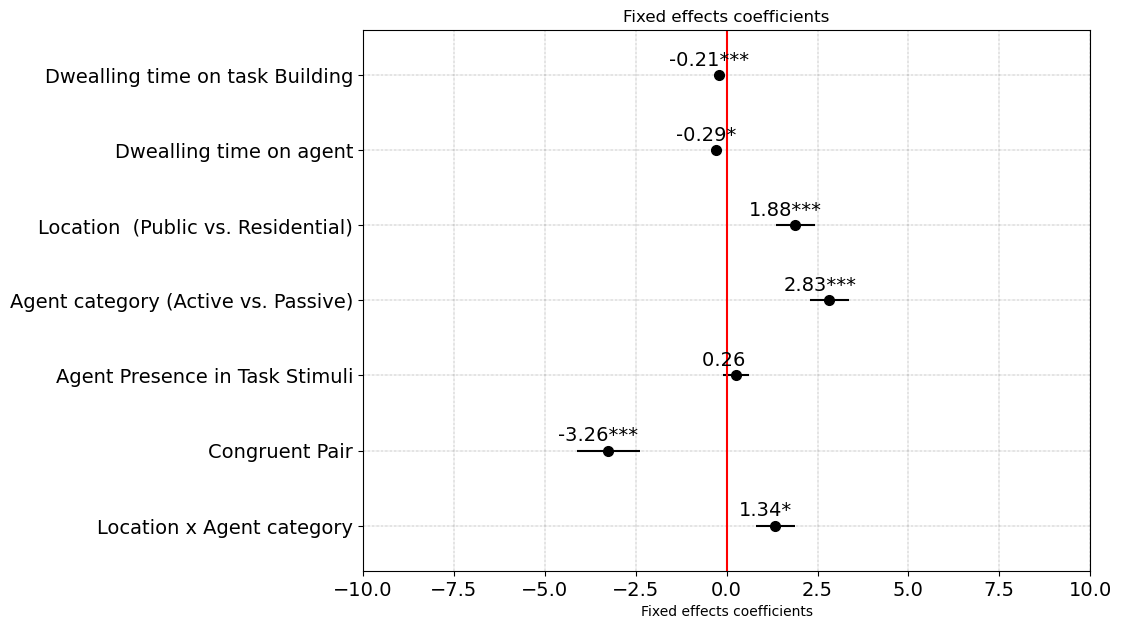

In [52]:
fig, axes = plt.subplots(1, 1,sharey=True,  figsize=(8, 6))
fig.tight_layout()

# Sample data (replace this with your actual data)
Complete_modelf = Complete_model.iloc[1:].copy()
Complete_modelf.sort_values('Unnamed: 0',  ascending=False, inplace=True)
Complete_modelf["Significance"] = np.where(Complete_modelf["Pr(>|t|)"] < 0.001, "***", np.where(Complete_modelf["Pr(>|t|)"] < 0.05, "*", " "))
Complete_modelf["Anotate"] = Complete_modelf["Estimate"].round(2).astype(str) + Complete_modelf["Significance"]

# Create the error bar plot
plt.errorbar(x=Complete_modelf["Estimate"], y=Complete_modelf["Factor"],
                  xerr=Complete_modelf["Standard_Error"], fmt='o', color='black', markersize=7, capthick=20)

# Annotate each point with the "Anotate" values
for xi, yi, annotation in zip(Complete_modelf["Estimate"], Complete_modelf["Factor"], Complete_modelf["Anotate"]):
    plt.annotate(annotation, (xi, yi), textcoords="offset points", xytext=(-7, 7), ha='center', fontsize=14)

# Adding grid lines and vertical red line at x=0
plt.grid(True, color="grey", linewidth=0.3, linestyle="-.")
plt.axvline(x=0, color='r')

# Set labels and title
plt.xlabel(r"Fixed effects coefficients")
plt.title(r'Fixed effects coefficients')
plt.xlim((-10, 10))
axes.tick_params(axis='both', labelsize=14)
axes.margins(0.1)

plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Model_Estimates.png",  bbox_inches="tight",
            pad_inches=0.3)

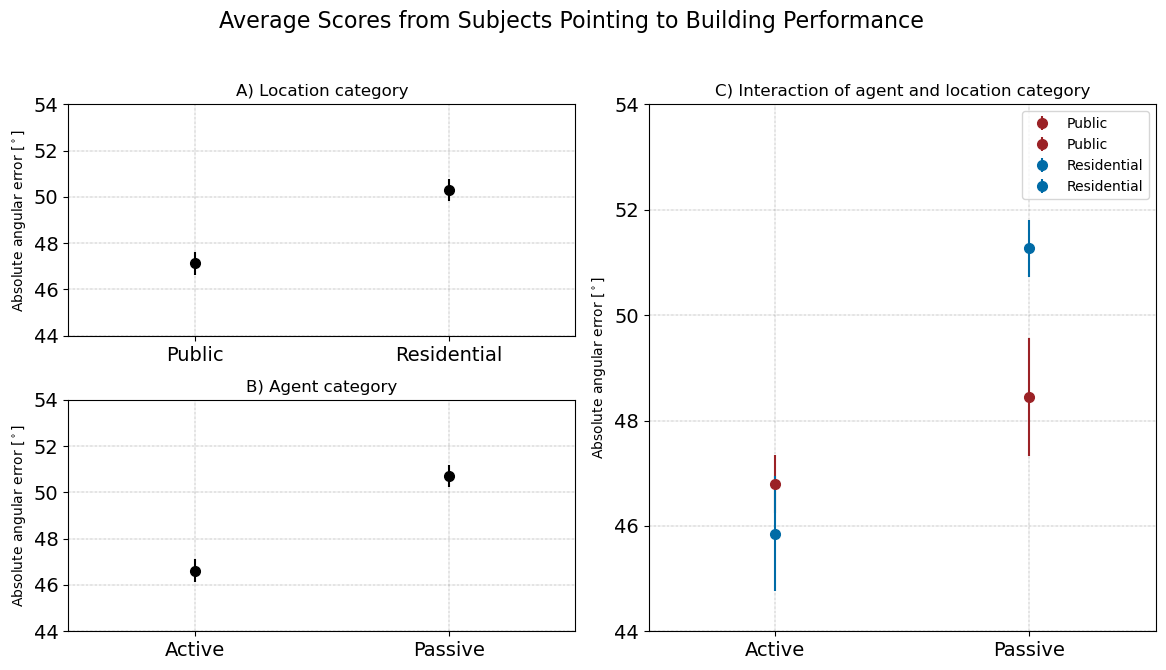

<Figure size 640x480 with 0 Axes>

In [53]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def plot_errorbar(ax, x, y, yerr, color, label):
    ax.errorbar(x=x, y=y, yerr=yerr, fmt='o', color=color, label=label, markersize=7, capthick=20)

fig = plt.figure(figsize=(12, 7))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1])  # Adjusted gridspec

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[:, 1])  # This makes ax2 span both rows

# Plot for Building Category
plot_errorbar(ax0, [0, 1], Performance_Building['mean'].values, Performance_Building['Standard_error_performance'].values, '#000000', None)
ax0.set_xticks([0, 1])
ax0.set_xticklabels(['Public', 'Residential'])
ax0.set_title('A) Location category')

# Plot for Agent Category
plot_errorbar(ax1, [0, 1], Performance_Agent['mean'].values, Performance_Agent['Standard_error_performance'].values, '#000000', None)
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Active', 'Passive'])
ax1.set_title('B) Agent category')

# Plot for Interaction
colors = {'Public': '#9b2226', 'Residential': '#006ba6'}
for i, row in Performance_Interaction.iterrows():
    plot_errorbar(ax2, row['Agent_Category'], row['mean'], row['Standard_error_performance'], colors[row['Building_Category']], row['Building_Category'])

ax2.set_xticks([0, 1])
ax2.set_xticklabels(['Active', 'Passive'])
ax2.set_title('C) Interaction of agent and location category')
ax2.legend()

# Further Customizations
axes = [ax0, ax1, ax2]
for ax in axes:
    ax.set_xlim((-0.5, 1.5))
    ax.set_ylim((44, 54))
    ax.set_ylabel("Absolute angular error [$^\circ$]")
    ax.grid(True, color="grey", linewidth="0.3", linestyle="-.")
    ax.tick_params(axis='both', labelsize=14)

fig.suptitle('Average Scores from Subjects Pointing to Building Performance', fontsize=16)
plt.tight_layout(rect=[0.02, 0.03, 1, 0.95])
plt.show()
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Two_Experiments_Three_plots.png", bbox_inches="tight", pad_inches=0.3, transparent=True)


/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_8286/4246781419.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Public Building", "Residential Building"])


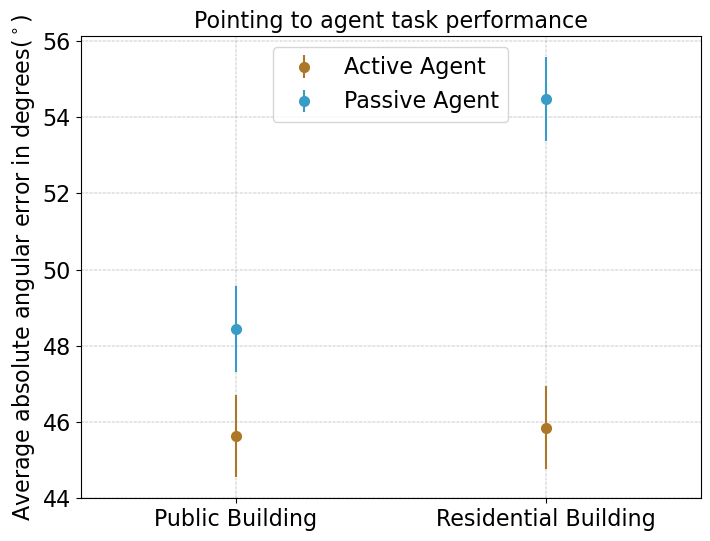

<Figure size 640x480 with 0 Axes>

In [54]:
# Data for Experiment 2
fig, ax = plt.subplots(1, 1, sharey=True,  figsize=(8, 6))
exp2_data = {
    "Active Agent": Performance['Exp2_Active'],
    "Passive Agent": Performance['Exp2_Passive']
}

# Plotting using the function
for agent, data in exp2_data.items():
    plot_errorbar_agent(ax, data, "AbsolutError_mean", "Standard_error_performance", Colors_Agent[agent], agent)

ax.set_title('Pointing to agent task performance', fontsize=16)
ax.legend(loc="upper center", fontsize=16)
ax.tick_params(axis='both', labelsize=16)
ax.set_ylabel("Average absolute angular error in degrees($^\circ$)", fontsize=16)
ax.set_xticklabels(["Public Building", "Residential Building"])
ax.set_xlim((-0.5, 1.5))
ax.grid(True, color="grey", linewidth="0.3", linestyle="-.")

plt.show()
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Absolut_Error_OneStandard_Agent.png", bbox_inches="tight", pad_inches=0.3, transparent=True)

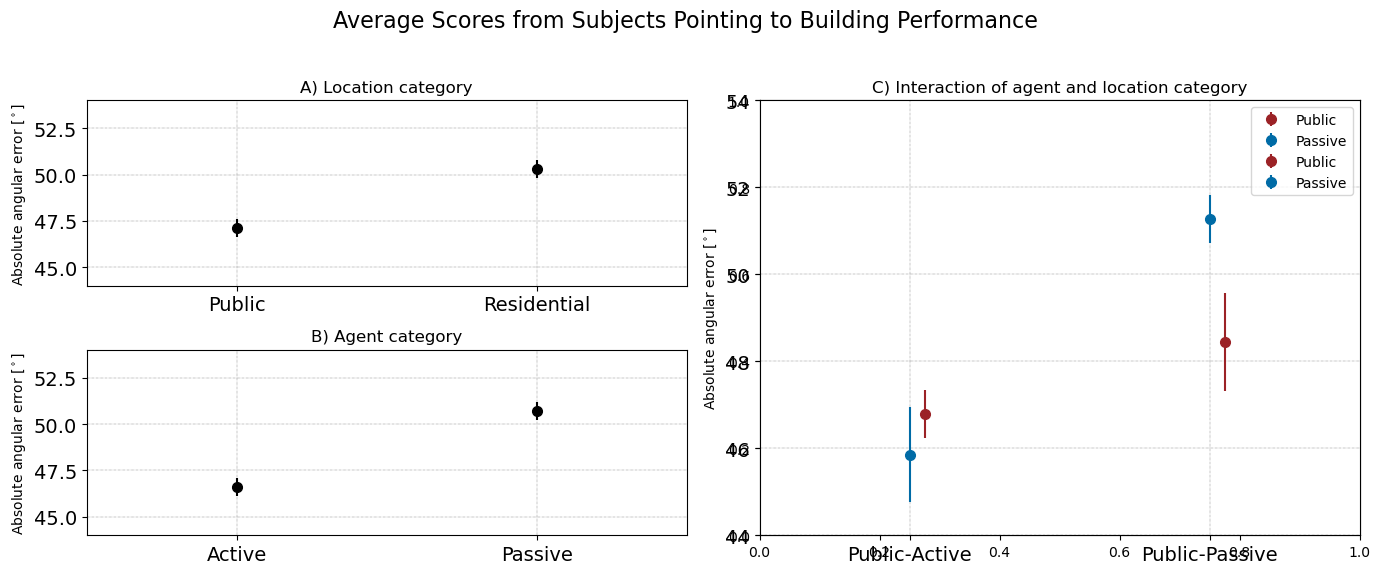

<Figure size 640x480 with 0 Axes>

In [55]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#def plot_errorbar(ax, x, y, yerr, color, label):
    #ax.errorbar(x=x, y=y, yerr=yerr, fmt='o', color=color, label=label, markersize=7, capthick=20)

fig = plt.figure(figsize=(14, 6))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1])  # Adjusted gridspec

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[:, 1])  # This makes ax2 span both rows

# Plot for Building Category
plot_errorbar(ax0, [0, 1], Performance_Building['mean'].values, Performance_Building['Standard_error_performance'].values, '#000000', None)
ax0.set_xticks([0, 1])
ax0.set_xticklabels(['Public', 'Residential'])
ax0.set_title('A) Location category')

# Plot for Agent Category
plot_errorbar(ax1, [0, 1], Performance_Agent['mean'].values, Performance_Agent['Standard_error_performance'].values, '#000000', None)
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Active', 'Passive'])
ax1.set_title('B) Agent category')


# Plot for Interaction
ax2 = fig.add_subplot(gs[:,1])  # this makes it span two rows
ax2.errorbar(x=0 + 0.05,y=Performance_Interaction.iloc[0][3], 
             yerr=Performance_Interaction.iloc[0][6], fmt='o', color= '#9b2226', label= "Public", markersize=7, capthick=20)
ax2.errorbar(x=Performance_Interaction.iloc[2][1],y=Performance_Interaction.iloc[2][3], 
             yerr=Performance_Interaction.iloc[2][6], fmt='o', color= '#006ba6', label= "Passive", markersize=7, capthick=20)
ax2.errorbar(x=1 + 0.05,y=Performance_Interaction.iloc[1][3], 
             yerr=Performance_Interaction.iloc[1][6], fmt='o', color= '#9b2226', label= "Public", markersize=7, capthick=20)
ax2.errorbar(x=Performance_Interaction.iloc[3][1],y=Performance_Interaction.iloc[3][3], 
             yerr=Performance_Interaction.iloc[3][6], fmt='o', color= '#006ba6', label= "Passive", markersize=7, capthick=20)
ax2.legend(loc="upper center", fontsize=14)
ax2.set_title('C) Interaction of agent and location category')


ax2.set_xticks([0, 1, 2, 3])
ax2.set_xticklabels(['Public-Active', 'Public-Passive', 'Residential-Active', 'Residential-Passive'])
ax2.set_title('C) Interaction of agent and location category')
ax2.legend()

# Further Customizations
axes = [ax0, ax1, ax2]
for ax in axes:
    ax.set_xlim((-0.5, 1.5))
    ax.set_ylim((44, 54))
    ax.set_ylabel("Absolute angular error [$^\circ$]")
    ax.grid(True, color="grey", linewidth="0.3", linestyle="-.")
    ax.tick_params(axis='both', labelsize=14)

fig.suptitle('Average Scores from Subjects Pointing to Building Performance', fontsize=16)
plt.tight_layout(rect=[0.02, 0.03, 1, 0.95])
plt.show()
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Two_Experiments_Three_plots.png", bbox_inches="tight", pad_inches=0.3, transparent=True)


/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_8286/699420338.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(labels=["Public", "Residential"], multialignment= "right")


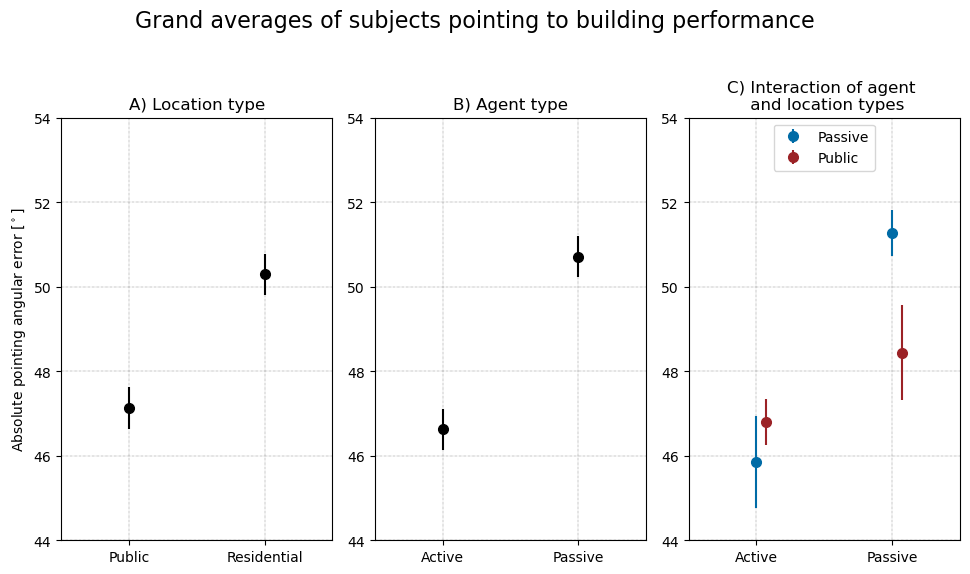

<Figure size 640x480 with 0 Axes>

In [56]:
# Create a new figure
fig = plt.figure(figsize=(10, 6))
# Define the grid structure. 2 rows by 2 columns. 
# The second column (the one on the right) will span 2 rows.
gs = gridspec.GridSpec(1, 3)

# Add the first plot to the top-left
ax0 = fig.add_subplot(gs[0,0])
ax0.errorbar(x=Performance_Building.iloc[0][0],y=Performance_Building.iloc[0][2], 
             yerr=Performance_Building.iloc[0][5], fmt='o', color= '#000000', label= "Public", markersize=7, capthick=20)
ax0.errorbar(x=1,y=Performance_Building.iloc[1][2], 
             yerr=Performance_Building.iloc[1][5], fmt='o', color= '#000000', label= "Residential", markersize=7, capthick=20)
ax0.set_xticklabels(labels=["Public", "Residential"], multialignment= "right")
ax0.set_title('A) Location type')
ax0.set_ylim((44,54))
ax0.set_ylabel("Absolute pointing angular error [$^\circ$]")

# Add the second plot to the bottom-left
ax1 = fig.add_subplot(gs[0,1], sharey=ax0)
ax1.errorbar(x=Performance_Agent.iloc[0][0],y=Performance_Agent.iloc[0][2], 
             yerr=Performance_Agent.iloc[0][5], fmt='o', color= '#000000', label= "Active", markersize=7, capthick=20)
ax1.errorbar(x=Performance_Agent.iloc[1][0],y=Performance_Agent.iloc[1][2], 
             yerr=Performance_Agent.iloc[1][5], fmt='o', color= '#000000', label= "Passive", markersize=7, capthick=20)
ax1.set_title('B) Agent type')

# Add the third plot, which spans two rows on the right
ax2 = fig.add_subplot(gs[0,2], sharey=ax0)  # this makes it span two rows
ax2.errorbar(x=0 + 0.07,y=Performance_Interaction.iloc[0][3], 
             yerr=Performance_Interaction.iloc[0][6], fmt='o', color= '#9b2226', label= "Public", markersize=7, capthick=20)
ax2.errorbar(x=Performance_Interaction.iloc[2][1],y=Performance_Interaction.iloc[2][3], 
             yerr=Performance_Interaction.iloc[2][6], fmt='o', color= '#006ba6', label= "Passive", markersize=7, capthick=20)
ax2.errorbar(x=1 + 0.07,y=Performance_Interaction.iloc[1][3], 
             yerr=Performance_Interaction.iloc[1][6], fmt='o', color= '#9b2226', label= "Public", markersize=7, capthick=20)
ax2.errorbar(x=Performance_Interaction.iloc[3][1],y=Performance_Interaction.iloc[3][3], 
             yerr=Performance_Interaction.iloc[3][6], fmt='o', color= '#006ba6', label= "Passive", markersize=7, capthick=20)


# For ax2's legend, manually select the first and third legend entries
handles, labels = ax2.get_legend_handles_labels()
desired_legend = [handles[1], handles[0], labels[1], labels[0]]
ax2.legend([desired_legend[0], desired_legend[1]], [desired_legend[2], desired_legend[3]], loc="upper center", fontsize=10)
ax2.set_title('C) Interaction of agent \n and location types')

for n, subplot in np.ndenumerate([ax0,ax1,ax2]):
    subplot.set_xlim((-0.5, 1.5))
    subplot.xaxis.set_major_locator(matplotlib.ticker.FixedLocator([0,1]))
    subplot.grid(True, color = "grey", linewidth = "0.3", linestyle = "-.")
    subplot.tick_params(axis='both', labelsize=10)
fig.suptitle('Grand averages of subjects pointing to building performance', fontsize=16)
plt.tight_layout(rect=[0.02, 0.03, 1, 0.95])
plt.show()
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Two_Experiments_Three_plots.png",  bbox_inches="tight",
            pad_inches=0.3, transparent=True)

In [57]:
handles, labels = ax2.get_legend_handles_labels()
labels

['Public', 'Passive', 'Public', 'Passive']

In [58]:
SecondExp_Inter_Building.head()

,Task,Building_Category,size,mean,median,std,Standard_error_performance
0,Agent,Public,2460,58.173805,45.343942,47.185662,0.951355
1,Agent,Residential,2412,55.485415,43.417974,46.141624,0.939516
2,Building,Public,3247,47.061006,32.188579,44.415537,0.779460
3,Building,Residential,3243,50.531288,37.205855,44.569364,0.782642


In [59]:
SecondExp_Inter_Building.head()

,Task,Building_Category,size,mean,median,std,Standard_error_performance
0,Agent,Public,2460,58.173805,45.343942,47.185662,0.951355
1,Agent,Residential,2412,55.485415,43.417974,46.141624,0.939516
2,Building,Public,3247,47.061006,32.188579,44.415537,0.779460
3,Building,Residential,3243,50.531288,37.205855,44.569364,0.782642


In [60]:
SecondExp_Inter_Agent.head()

,Task,Agent_Category,size,mean,median,std,Standard_error_performance
0,Agent,Active,2273,54.290937,40.489016,46.224665,0.969559
1,Agent,Passive,2599,59.074675,47.531289,46.981628,0.921563
2,Building,Active,3073,45.733875,32.787709,42.495643,0.766590
3,Building,Passive,3417,51.548100,36.825687,46.103108,0.788693


In [61]:
SecondExp_Inter_Agent.iloc[2,3]

45.73387534854927

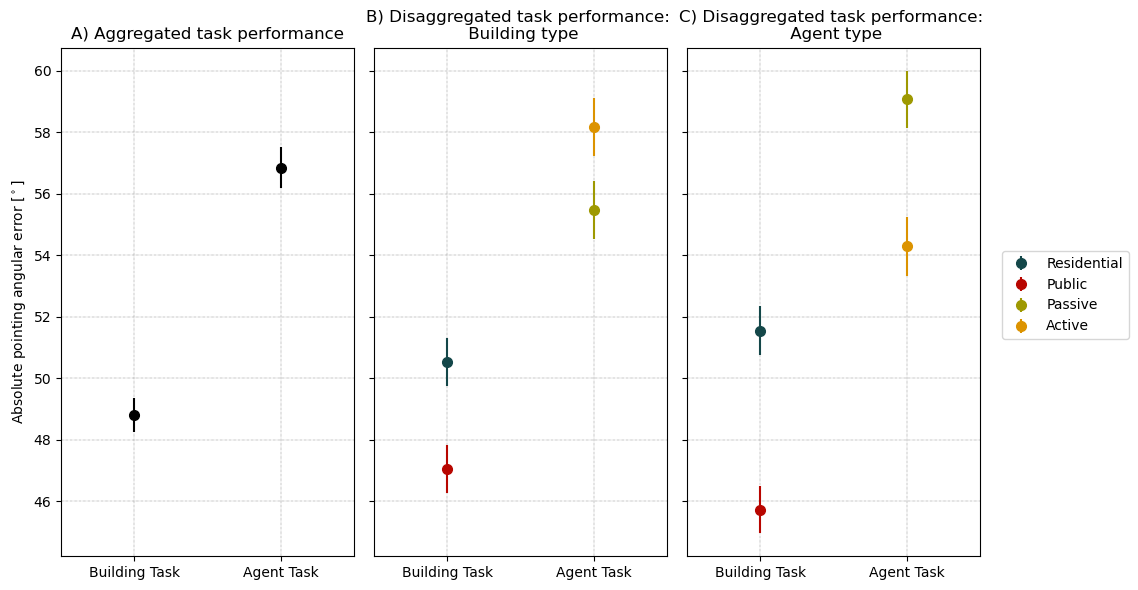

In [62]:
def plot_errorbar(ax, data, x_col, y_col, yerr_col, color, label=None, **kwargs):
    ax.errorbar(x=data[x_col] + ' Task', y=data[y_col], 
                yerr=data[yerr_col], color=color, label=label, **kwargs)

# Create a new figure
fig, axes = plt.subplots(1, 3, figsize=(10, 6), sharey=True)

# First plot
plot_errorbar(axes[0], SecondExp.iloc[1], 0, 3, 6, '#000000', markersize=7, capthick=20, fmt='o')
plot_errorbar(axes[0], SecondExp.iloc[0], 0, 3, 6, '#000000', markersize=7, capthick=20, fmt='o')
axes[0].set_title('A) Aggregated task performance')
axes[0].set_ylabel("Absolute pointing angular error [$^\circ$]")


# Second plot
colors = ['#DC9300', '#9E9901', '#B80600', '#144749',]
for i in  range(3, -1, -1):
    plot_errorbar(axes[1], SecondExp_Inter_Building.iloc[i], 0, 3, 6, colors[i], label=SecondExp_Inter_Building.iloc[i, 1], markersize=7, capthick=20, fmt='o')

handles, labels = axes[1].get_legend_handles_labels()
axes[1].set_title('B) Disaggregated task performance: \n Building type')

# Third plot
for i in range(3, -1, -1):
    plot_errorbar(axes[2], SecondExp_Inter_Agent.iloc[i], 0, 3, 6, colors[i], label=SecondExp_Inter_Agent.iloc[i, 1], markersize=7, capthick=20, fmt='o')

axes[2].set_title('C) Disaggregated task performance: \n Agent type')

# Shared settings
for ax in axes:
    ax.set_xlim((-0.5, 1.5))
    ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator([0,1]))
    ax.grid(True, color = "grey", linewidth = "0.3", linestyle = "-.")
    ax.tick_params(axis='both', labelsize=10)
    ax.set_xticklabels(labels=["Building Task", "Agent Task"], multialignment= "right")

handles, labels = axes[2].get_legend_handles_labels()
labels=["Residential", "Public", "Passive", "Active"]
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig("/Volumes/TwoTeras/2_DataSets_Experiments_1_2/Plots/Pointing_BuildingVsAgent.png", bbox_inches="tight", pad_inches=0.3, transparent=True)

In [63]:
SecondExp_Inter_Agent

,Task,Agent_Category,size,mean,median,std,Standard_error_performance
0,Agent,Active,2273,54.290937,40.489016,46.224665,0.969559
1,Agent,Passive,2599,59.074675,47.531289,46.981628,0.921563
2,Building,Active,3073,45.733875,32.787709,42.495643,0.766590
3,Building,Passive,3417,51.548100,36.825687,46.103108,0.788693


In [64]:
ConcatSecondExperiment['SignedAngle-+180'].describe()

count    11362.000000
mean        -5.906347
std         69.119959
min       -179.971653
25%        -45.462373
50%         -4.658817
75%         31.777086
max        179.801385
Name: SignedAngle-+180, dtype: float64

In [65]:
Complete_Experiments.head()

,SubjectID,AbsolutError,SignedAngle-+180,IQR,RT,DistanceToParticipant,PointingTaskStartingLocations,TrialNumber,StartPointID,ID_for_StartingPosition,...,ImageName,Dwelling_Time_Building_Gaze,Fixation_Count_Building_Gaze,Dwelling_Time_Agent_Gaze,Fixation_Count_Agent_Gaze,Agent_Action_level,Agent_Category,Building_Category,Congruent,Task
0,365,15.396716,15.396716,63.921884,25.825715,197.768723,21,1,1,1,...,46_Sa,37.230251,186.0,3.428844,12.0,Passive,Passive,Residential,Incongruent,NaN
1,365,6.037733,-6.037733,63.921884,4.799789,213.475525,16,78,7,6,...,46_SaNo,37.230251,186.0,3.428844,12.0,Passive,Passive,Residential,Incongruent,NaN
2,365,6.345290,6.345290,63.921884,4.638590,111.623512,13,88,8,4,...,46_Sa,37.230251,186.0,3.428844,12.0,Passive,Passive,Residential,Incongruent,NaN
3,365,3.627752,3.627752,63.921884,2.361455,111.623512,13,95,8,11,...,46_SaNo,37.230251,186.0,3.428844,12.0,Passive,Passive,Residential,Incongruent,NaN
4,365,19.115237,-19.115237,63.921884,5.975304,232.765823,8,131,11,11,...,46_SaNo,37.230251,186.0,3.428844,12.0,Passive,Passive,Residential,Incongruent,NaN


In [66]:
SecondExp.iloc[0][5]

46.68627359288108

In [67]:
Performance_Building.iloc[1][4]

44.51054710864119

In [68]:
Performance_Building.iloc[1][0]

'Residential'

In [69]:
Complete_Experiments.columns

Index(['SubjectID', 'AbsolutError', 'SignedAngle-+180', 'IQR', 'RT',
       'DistanceToParticipant', 'PointingTaskStartingLocations', 'TrialNumber',
       'StartPointID', 'ID_for_StartingPosition', 'avatar_ID',
       'AvatarPresenceCategory', 'Context', 'meaningfulBuilding', 'ImageName',
       'Dwelling_Time_Building_Gaze', 'Fixation_Count_Building_Gaze',
       'Dwelling_Time_Agent_Gaze', 'Fixation_Count_Agent_Gaze',
       'Agent_Action_level', 'Agent_Category', 'Building_Category',
       'Congruent', 'Task'],
      dtype='object')

/Users/tracysanchezpacheco/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


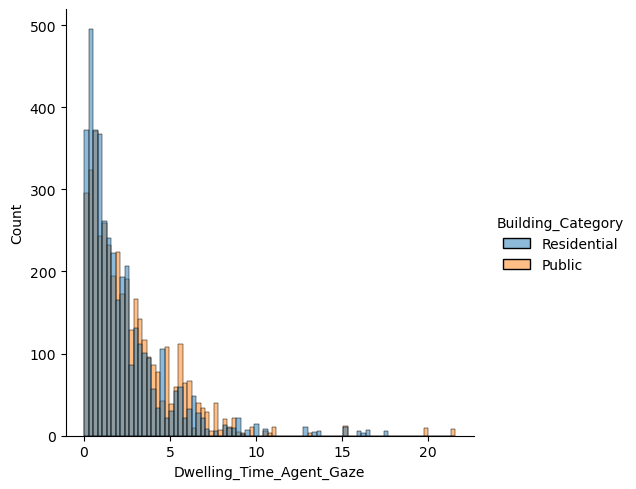

In [70]:
sns.displot(data=BehavioralData_Fixations_Wide_Exp1, x="Dwelling_Time_Agent_Gaze", hue="Building_Category")

In [71]:

grouped = BehavioralData_Fixations_Wide_Exp2.groupby(["Agent_Category", "Building_Category"]).mean().reset_index()
grouped["Building_Agent"] = grouped["Building_Category"] + " location \n" + grouped["Agent_Category" ] + " Agent"  
plt.tight_layout()
# Define the position for the bars
bar_positions = range(len(grouped))

# Create a new figure
fig = plt.figure(figsize=(24, 8))
# Define the grid structure. 2 rows by 2 columns. 
# The second column (the one on the right) will span 2 rows.
gs = gridspec.GridSpec(1, 2)

# Add the first plot to the top-left
ax0 = fig.add_subplot(gs[0,0])

# Plot the data
ax0.bar(bar_positions, grouped['Dwelling_Time_Building_Gaze'], label='Dwelling Time on Building', color= '#006ba6')
ax0.bar(bar_positions, grouped['Dwelling_Time_Agent_Gaze'], bottom=grouped['Dwelling_Time_Building_Gaze'], label='Dwelling Time on Agent',  color= '#9b2226')

# Set the x-ticks and their labels
ax0.set_xticks(bar_positions, grouped['Building_Agent'], rotation=0)

# Add labels, legend and title
ax0.set_xlabel('Experimental buildings')
ax0.set_ylabel('Average Dwelling Time')
ax0.set_title('Stacked Histogram of Dwelling Times')
ax0.legend()

# Display the plot

plt.show()


TypeError: Could not convert PresentPresentOmittedPresentPresentOmittedPresentPresentPresentOmittedPresentOmittedPresentOmittedPresentOmittedPresentOmittedPresentOmittedOmittedPresentPresentOmittedPresentOmittedOmittedOmittedOmittedOmittedPresentOmittedOmittedPresentOmittedPresentPresentOmittedOmittedOmittedOmittedOmittedOmittedOmittedOmittedOmittedOmittedOmittedPresentPresentOmittedPresentPresentOmittedPresentPresentOmittedOmittedPresentPresentPresentOmittedOmittedOmittedPresentOmittedOmittedPresentOmittedPresentOmittedOmittedOmittedPresentPresentOmittedPresentOmittedPresentPresentPresentOmittedOmittedPresentOmittedOmittedOmittedPresentOmittedOmittedOmittedPresentPresentPresentPresentPresentOmittedPresentPresentOmittedOmittedOmittedOmittedPresentOmittedOmittedPresentPresentOmittedPresentPresentPresentOmittedOmittedOmittedPresentOmittedOmittedPresentPresentOmittedPresentOmittedPresentOmittedPresentPresentPresentOmittedPresentPresentOmittedPresentPresentOmittedOmittedPresentOmittedPresentPresentPresentOmittedPresentOmittedPresentOmittedOmittedPresentOmittedOmittedOmittedOmittedOmittedOmittedPresentPresentOmittedOmittedPresentOmittedOmittedPresentPresentOmittedOmittedPresentPresentPresentOmittedOmittedPresentPresentOmittedOmittedOmittedPresentOmittedOmittedPresentOmittedOmittedOmittedPresentPresentOmittedPresentOmittedOmittedPresentPresentPresentOmittedOmittedOmittedOmittedOmittedOmittedPresentOmittedOmittedPresentOmittedOmittedPresentOmittedPresentPresentPresentOmittedOmittedPresentPresentPresentPresentPresentOmittedOmittedPresentOmittedPresentOmittedOmittedOmittedPresentOmittedOmittedOmittedPresentOmittedPresentPresentOmittedOmittedOmittedPresentPresentPresentPresentOmittedPresentPresentOmittedPresentPresentPresentPresentPresentOmittedOmittedOmittedOmittedOmittedPresentPresentPresentOmittedOmittedOmittedOmittedPresentOmittedPresentOmittedOmittedPresentPresentOmittedOmittedPresentPresentPresentOmittedOmittedPresentOmittedPresentPresentOmittedPresentOmittedOmittedPresentOmittedOmittedPresentPresentPresentPresentOmittedOmittedOmittedPresentPresentPresentOmittedOmittedPresentPresentOmittedPresentOmittedPresentOmittedOmittedOmittedPresentOmittedOmittedOmittedOmittedOmittedPresentPresentPresentOmittedPresentPresentOmittedOmittedPresentPresentPresentOmittedPresentOmittedPresentOmittedOmittedOmittedOmittedOmittedOmittedPresentPresentOmittedPresentOmittedPresentOmittedOmittedPresentOmittedOmittedOmittedPresentOmittedOmittedOmittedOmittedOmittedOmittedOmittedOmittedOmittedOmittedOmittedOmittedPresentPresentOmittedPresentOmittedPresentPresentPresentOmittedPresentOmittedOmittedPresentPresentOmittedOmittedPresentPresentPresentPresentPresentPresentOmittedOmittedPresentOmittedOmittedPresentOmittedPresentOmittedOmittedPresentPresentOmittedPresentPresentOmittedOmittedPresentOmittedPresentPresentOmittedPresentPresentPresentPresentPresentOmittedPresentOmittedPresentOmittedPresentPresentPresentPresentOmittedPresentOmittedPresentPresentOmittedPresentPresentOmittedOmittedPresentOmittedPresentOmittedOmittedOmittedOmittedPresentPresentPresentPresentOmittedOmittedPresentPresentPresentPresentOmittedOmittedPresentOmittedOmittedOmittedOmittedOmittedPresentOmittedOmittedPresentPresentPresentPresentOmittedPresentPresentPresentPresentOmittedPresentPresentOmittedPresentPresentOmittedOmittedPresentOmittedPresentPresentPresentPresentOmittedPresentPresentPresentPresentOmittedOmittedPresentOmittedPresentPresentOmittedPresentOmittedOmittedOmittedPresentOmittedPresentPresentOmittedOmittedOmittedOmittedOmittedOmittedOmittedOmittedPresentOmittedOmittedOmittedOmittedPresentPresentPresentPresentPresentOmittedOmittedOmittedPresentOmittedOmittedOmittedOmittedOmittedPresentPresentOmittedOmittedOmittedPresentPresentOmittedPresentOmittedPresentPresentPresentPresentPresentOmittedPresentPresentPresentPresentOmittedPresentOmittedOmittedOmittedOmittedOmittedOmittedPresentPresentPresentOmittedPresentOmittedPresentOmittedPresentPresentPresentPresentPresentOmittedOmittedOmittedPresentOmittedOmittedPresentOmittedOmittedOmittedPresentPresentOmittedOmittedOmittedPresentOmittedOmittedPresentPresentPresentOmittedPresentOmittedOmittedOmittedPresentOmittedPresentPresentPresentOmittedPresentOmittedOmittedOmittedPresentOmittedOmittedPresentOmittedOmittedPresentPresentPresentOmittedOmittedOmittedOmittedOmittedOmittedOmittedPresentPresentOmittedPresentOmittedOmittedOmittedOmittedOmittedPresentOmittedOmittedPresentPresentPresentPresentOmittedOmittedOmittedOmittedOmittedPresentOmittedPresentPresentPresentOmittedPresentPresentOmittedPresentPresentPresentOmittedOmittedPresentPresentOmittedOmittedOmittedPresentPresentOmittedPresentOmittedOmittedOmittedOmittedOmittedOmittedPresentPresentOmittedOmittedPresentPresentPresentOmittedOmittedOmittedPresentOmittedPresentOmittedPresentOmittedOmittedOmittedOmittedPresentPresentOmittedPresentOmittedOmittedPresentPresentOmittedPresentOmittedPresentOmittedOmittedPresentOmittedPresentPresentOmittedOmittedOmittedPresentPresentOmittedPresentPresentPresentPresentPresentPresentPresentPresentPresentPresentPresentPresentPresentPresentOmittedOmittedOmittedOmittedOmittedOmittedOmittedPresentOmittedOmittedOmittedPresentOmittedPresentPresentOmittedOmittedPresentOmittedOmittedPresentPresentOmittedOmittedPresentPresentPresentPresentOmittedPresentPresentPresentPresentOmittedPresentPresentPresentOmittedPresentPresentOmittedPresentPresentPresentPresentPresentOmittedPresentOmittedOmittedPresentPresentPresentPresentPresentOmittedPresentOmittedOmittedPresentOmittedPresentPresentOmittedOmittedOmittedOmittedOmittedOmittedOmittedPresentPresentPresentPresentPresentPresentOmittedOmittedPresentOmittedOmittedOmittedPresentOmittedOmittedPresentPresentPresentOmittedPresentOmittedOmittedPresentPresentOmittedOmittedPresentPresentPresentPresentOmittedPresentOmittedOmittedPresentPresentPresentPresentOmittedPresentOmittedOmittedOmittedOmittedPresentPresentOmittedOmittedOmittedOmittedPresentOmittedOmittedPresentPresentOmittedOmittedPresentPresentPresentPresentOmittedPresentOmittedOmittedOmittedPresentOmittedOmittedPresentPresentOmittedPresentOmittedPresentPresentOmittedPresentOmittedPresentOmittedPresentOmittedOmittedOmittedOmittedPresentPresentOmittedOmittedPresentPresentOmittedPresentOmittedPresentOmittedOmittedOmittedPresentOmittedPresentOmittedPresentOmittedPresentOmittedPresentOmittedPresentPresentOmittedOmittedPresentOmittedOmittedOmittedPresentOmittedOmittedOmittedOmittedPresentOmittedPresentOmittedOmittedOmittedPresentOmittedOmittedOmittedPresentOmittedOmittedOmittedOmittedOmittedPresentOmittedOmittedPresentOmittedOmittedOmittedOmittedOmittedPresentOmittedOmittedOmittedPresentOmittedOmittedPresentOmittedOmittedPresentOmittedPresentOmittedOmittedPresentPresentOmittedPresentPresentOmittedPresentOmittedOmittedOmittedPresentPresentOmittedOmittedOmittedPresentPresentPresentPresentPresentPresentPresentPresentOmittedOmittedOmittedOmittedOmittedOmittedPresentPresentOmittedPresentPresentPresentPresentOmittedPresentOmittedOmittedOmittedOmittedPresentOmittedOmittedOmittedOmittedPresentOmittedPresentOmittedPresentOmittedOmittedPresentPresentPresentOmittedOmittedPresentOmittedPresentOmittedOmittedPresentOmittedOmittedPresentOmittedPresentOmittedOmittedPresentOmittedPresentPresentOmittedPresentPresentPresentPresentOmittedPresentPresentPresentOmittedPresentPresentPresentPresentPresentOmittedOmittedPresentPresentPresentOmittedOmittedOmittedOmittedOmittedPresentOmittedPresentPresentOmittedPresentOmittedOmittedPresentPresentPresentPresentOmittedPresentOmittedOmittedPresentOmittedOmittedOmittedPresentOmittedOmittedPresentPresentOmittedOmittedOmittedPresentPresentPresentOmittedPresentOmittedPresentPresentOmittedOmittedPresentPresentPresentOmittedOmittedPresentPresentOmittedPresentOmittedPresentOmittedOmittedPresentPresentOmittedPresentPresentPresentPresentPresentOmittedPresentPresentOmittedPresentPresentPresentOmittedOmittedPresentPresentOmittedOmittedOmittedPresentPresentOmittedOmittedOmittedPresentOmittedPresentOmittedOmittedOmittedOmittedOmittedPresentPresentPresentPresentPresentPresentOmittedOmittedPresentOmittedOmittedPresentOmittedOmittedOmittedPresentOmittedOmittedOmittedPresentOmittedPresentOmittedPresentOmittedOmittedOmittedPresentOmittedOmittedPresentPresentPresentOmittedPresentPresentOmittedPresentOmittedPresentOmittedPresentOmittedPresentPresentOmittedOmittedOmittedOmittedPresentOmittedPresentPresentOmittedPresentOmittedPresentOmittedOmittedPresentPresentOmittedPresentOmittedOmittedPresentOmittedPresentPresentOmittedPresentPresentOmittedPresentOmittedPresentOmittedPresentPresentPresentOmittedPresentPresentPresentOmittedPresentOmittedPresentPresentPresentOmittedPresentOmittedOmittedPresentOmittedOmittedOmittedPresentOmittedOmittedOmittedPresentPresentOmittedOmittedOmittedPresentPresentPresentPresentOmittedPresentPresentOmittedPresentPresentPresentPresentOmittedPresentPresentPresentPresentPresentOmittedPresentOmittedOmittedPresentOmittedOmittedOmittedPresentOmittedPresentPresentPresentOmittedPresentPresentPresentPresentOmittedPresentOmittedOmittedPresentOmittedOmittedOmittedOmittedOmittedPresentOmittedOmittedOmittedOmittedOmittedOmittedPresentPresentOmittedOmittedOmittedOmittedPresentOmittedOmittedOmittedOmittedOmittedPresentPresentPresentPresentPresentOmittedOmittedPresentOmittedOmittedPresentPresentPresentPresentOmittedOmittedPresentOmittedOmittedOmittedPresentOmittedPresentOmittedPresentPresentOmittedPresentPresentOmittedOmittedPresentPresentPresentOmittedPresentOmittedPresentOmittedPresentOmittedPresentPresentOmittedPresentPresentPresentOmittedOmittedPresentPresentPresentPresentOmittedOmittedOmittedOmittedPresentPresentPresentOmittedOmittedPresentOmittedOmittedOmittedOmittedPresentOmittedOmittedPresentPresentOmittedPresentPresentOmittedPresentOmittedOmittedPresentOmittedOmittedOmittedPresentPresentOmittedPresentPresentPresentPresentPresentPresentPresentPresentPresentPresentPresentOmittedOmittedOmittedPresentPresentPresentOmittedPresentPresentPresentPresentPresentPresentPresentOmittedOmittedOmittedPresentPresentOmittedPresentPresentPresentPresentOmittedOmittedPresentPresentPresentPresentOmittedOmittedOmittedPresentOmittedOmittedOmittedOmittedOmittedPresentPresentPresentPresentOmittedPresentOmittedPresentOmittedOmittedOmittedPresentOmittedPresentPresentPresentOmittedOmittedPresentOmittedPresentPresentPresentPresentOmittedOmittedPresentOmittedOmittedOmittedOmittedPresentPresentOmittedPresentPresentPresentPresentOmittedPresentOmittedOmittedPresentPresentOmittedOmittedPresentOmittedPresentOmittedOmittedOmittedOmittedOmittedOmittedOmittedPresentPresentOmittedPresentPresentPresentPresentPresentPresentOmittedPresentPresentOmittedPresentPresentOmittedPresentPresentOmittedPresentPresentOmittedPresentPresentPresentOmittedOmittedPresentOmittedOmittedPresentPresentPresentOmittedPresentPresentOmittedOmittedPresentPresentOmittedOmittedPresentPresentOmittedPresentPresentOmittedPresentOmittedOmittedOmittedOmittedOmittedOmittedPresentOmittedOmittedOmittedOmittedOmittedPresentPresentOmittedOmittedPresentPresentPresentOmittedPresentPresentPresentPresentPresentOmittedOmittedOmittedPresentPresentPresentOmittedPresentOmittedPresentPresent to numeric

In [ ]:
grouped.head()